<a href="https://colab.research.google.com/github/ibriraya1/Predicting-Employee-Promotion/blob/main/Data_Understanding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Predicting whether an employee is promoted or not based on various factors**

The aim is to analyze the various factors that can contribute to the promotion of an employee. Based on the analysis, predict which employees will be promoted.

In [1]:
!pip install pandas
!pip install matplotlib
!pip install scikit-learn
#!pip install pandas-profiling

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd /content/drive/MyDrive

/content/drive/MyDrive


In [ ]:
cd /content/drive/MyDrive/Yasmine Colab/Thesis

/content/drive/MyDrive/Yasmine Colab/Thesis


In [ ]:
ls "/content/drive/MyDrive/Yasmine Colab/Thesis"

 1_draft.ipynb             'test_2umaH9m (1).csv'  'train_LZdllcl (1).csv'
 Data_Understanding.ipynb   test.csv                Treatment_Data.ipynb
 first_draft.ipynb          train.csv


# **Importing Python Libraries**



In [ ]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# **Loading the data**

In [ ]:
data_train=pd.read_csv(r'/content/drive/MyDrive/Yasmine Colab/Thesis/train.csv')
data_test=pd.read_csv(r'/content/drive/MyDrive/Yasmine Colab/Thesis/test.csv')

In [ ]:
# Read the train data
data_train

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,3030,Technology,region_14,Bachelor's,m,sourcing,1,48,3.0,17,0,0,78,0
54804,74592,Operations,region_27,Master's & above,f,other,1,37,2.0,6,0,0,56,0
54805,13918,Analytics,region_1,Bachelor's,m,other,1,27,5.0,3,1,0,79,0
54806,13614,Sales & Marketing,region_9,NaN,m,sourcing,1,29,1.0,2,0,0,45,0


In [ ]:
# Read the test data
data_test

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23485,53478,Legal,region_2,Below Secondary,m,sourcing,1,24,3.0,1,0,0,61
23486,25600,Technology,region_25,Bachelor's,m,sourcing,1,31,3.0,7,0,0,74
23487,45409,HR,region_16,Bachelor's,f,sourcing,1,26,4.0,4,0,0,50
23488,1186,Procurement,region_31,Bachelor's,m,sourcing,3,27,NaN,1,0,0,70


# **Dataset Info**



*   employeeid = Unique ID for the employee
*   department = Department of employee

*   region = Region of employment (unordered)
*   education = Education Level

*  gender = Gender of Employee 
*  recruitmentchannel = Channel of recruitment for employee

*  no of trainings = no of other trainings completed in the previous year on soft skills, technical skills, etc.
*  age = Age of Employee

*  previous year rating = Employee Rating for the previous year
*  length of service = Length of service in years

*  awards_ won = if awards won during the previous year then 1 else 0
*  avg training score = Average score in current training evaluations


*  KPIs_met >80% = if Percent of KPIs(Key performance Indicators) >80% then 1 else 0




*  is_promoted = (Target) Recommended for promotion















In [ ]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


Quite a few columns have the datatype as 'object' which are strings. 

# **Data types of all coloumns**

In [ ]:
data_train.dtypes

employee_id               int64
department               object
region                   object
education                object
gender                   object
recruitment_channel      object
no_of_trainings           int64
age                       int64
previous_year_rating    float64
length_of_service         int64
KPIs_met >80%             int64
awards_won?               int64
avg_training_score        int64
is_promoted               int64
dtype: object

# **Coloumns/features in data**

In [ ]:
data_train.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted'],
      dtype='object')

In [ ]:
data_test.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score'],
      dtype='object')

# **Length of data**

In [ ]:
print('lenght of train data is', len(data_train))

lenght of train data is 54808


In [ ]:
print('lenght of test data is', len(data_test))

lenght of test data is 23490


# **Shape of data**

In [ ]:
data_train.shape

(54808, 14)

In [ ]:
data_test.shape

(23490, 13)

# **Rows and columns in the dataset**

In [ ]:
print('Count of columns in the train data is:  ', len(data_train.columns))
print('Count of rows in the train data is:  ', len(data_train))

Count of columns in the train data is:   14
Count of rows in the train data is:   54808


In [ ]:
print('Count of columns in the test data is:  ', len(data_test.columns))
print('Count of rows in the test data is:  ', len(data_test))

Count of columns in the test data is:   13
Count of rows in the test data is:   23490


# **Checking Null values / missing values**

In [ ]:
np.sum(data_train.isnull().any(axis=1))

6148

In [ ]:
np.sum(data_test.isnull().any(axis=1))

2671

# **Counts of missing values in each column**

In [ ]:
data_train.isnull().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [ ]:
data_test.isnull().sum()

employee_id                0
department                 0
region                     0
education               1034
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    1812
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
dtype: int64

There are missing values in the column 'education' and 'previous_year_rating'. We will need to handle column types and missing values in data cleaning.

In [ ]:
# Get total missing values in 'education' column
data_train.education.isnull().sum()

2409

# **Check Duplicate Records**

In [ ]:
# Check if there is any duplicate employee ID


condition = bool(data_train.duplicated(subset = 'employee_id').any())

if condition:
    print('There are duplicate employee IDs')
else:
    print('No duplicate employee IDs')

No duplicate employee IDs


# **Data Description**

In [ ]:
data_train.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


# **Check class balance**

In [ ]:
data_train.is_promoted.value_counts(normalize=True)

0    0.91483
1    0.08517
Name: is_promoted, dtype: float64

In [ ]:
data_train.is_promoted.value_counts()

0    50140
1     4668
Name: is_promoted, dtype: int64

The majority classes are 0s with rare 1s, we consider the classes in this dataset are very imbalanced. We will need to use undersampling or oversampling techniques to make training data balanced.

# **Remove column 'employee_id' from the dataframe**

In [ ]:
data_train.drop(columns='employee_id',inplace=True)  
data_test.drop(columns='employee_id',inplace=True)  


In [ ]:
data_train

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,Technology,region_14,Bachelor's,m,sourcing,1,48,3.0,17,0,0,78,0
54804,Operations,region_27,Master's & above,f,other,1,37,2.0,6,0,0,56,0
54805,Analytics,region_1,Bachelor's,m,other,1,27,5.0,3,1,0,79,0
54806,Sales & Marketing,region_9,NaN,m,sourcing,1,29,1.0,2,0,0,45,0


# **Exploratory data analysis**

In [ ]:
from pandas_profiling import ProfileReport 
ProfileReport(data_train, title="EDA Report")

TypeError: ignored

# **Univariate Analysis**

Univariate analysis is perhaps the simplest form of statistical analysis. Like other forms of statistics, it can be inferential or descriptive. The key fact is that only one variable is involved. Univariate analysis can yield misleading results in cases in which multivariate analysis is more appropriate.

# **Numeric features distrubution**

In [ ]:
data_train.hist(figsize=(15,8),bins = 20, color="#107009AA")
plt.title("Numeric Features Distribution")
plt.show();

NameError: ignored

As we can see above, there are the values ranges of all features. Every feature have different distribution of values. To understand the features better and deeper, we are going to look at each one separately.

Surprisingly, in 'KPIs_met >80%' feature, more employees did not achieve this goal (0s) than employees who did (1s). There seems to be no outliers.

# No_of_Trainings Distribution

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


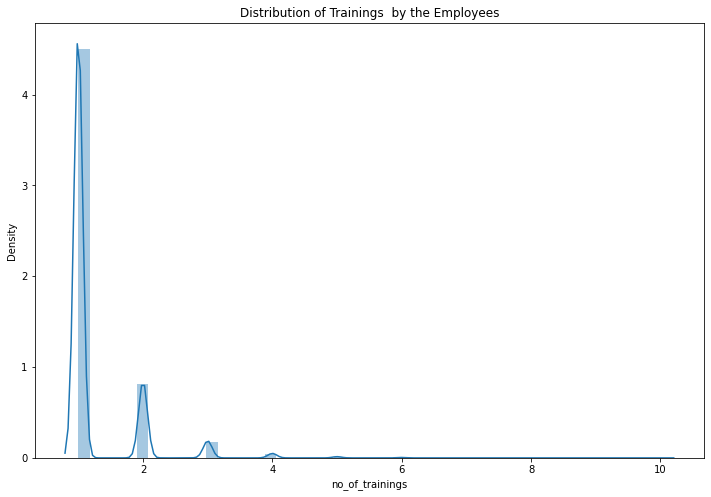

In [ ]:
plt.figure(figsize=(12,8))
sns.distplot(data_train['no_of_trainings'])
plt.title('Distribution of Trainings  by the Employees')
plt.show()



*   We can say that the data is ordinal data where it represents the number of reatings to the employee as it is a number it is given the int64 datatype, there is no harm in changing it into a object.
*   We can see that the data is right skewed.

*   Most of the employees have recieved 2 ratings and 3 ratings so we can see the peak at two.




/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


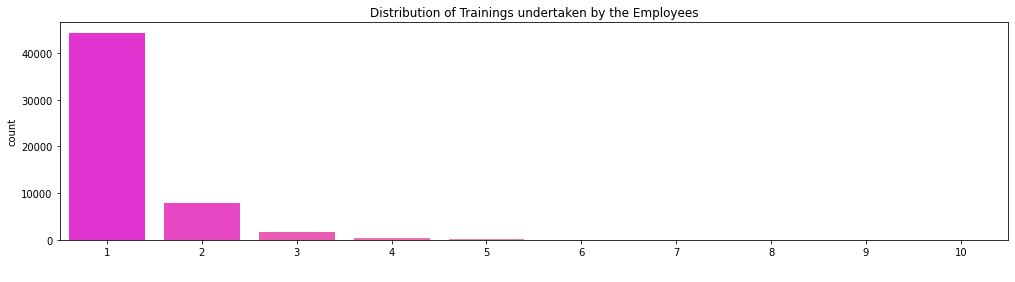

In [ ]:
# lets check the distribution of trainings undertaken by the employees

plt.rcParams['figure.figsize'] = (17, 4)
sns.countplot(data_train['no_of_trainings'], palette = 'spring')
plt.xlabel(' ', fontsize = 14)
plt.title('Distribution of Trainings undertaken by the Employees')
plt.show()

In [ ]:
data_train["no_of_trainings"].value_counts().head(10).plot(kind = 'pie', autopct='%1.1f%%', figsize=(10, 10), startangle=0).legend()
plt.title('No of Trainings', fontsize = 20)

NameError: ignored



*   If we look at the no_of_trainings, all employees participated one time with 81%





*   The abov Countplot, where are checking the distribution of trainings undertaken by the Employee, It is clearly visible that 80 % of the employees have taken the training only once, and there are negligible no. of employees, who took trainings more than thrice.


# Age Distribution

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


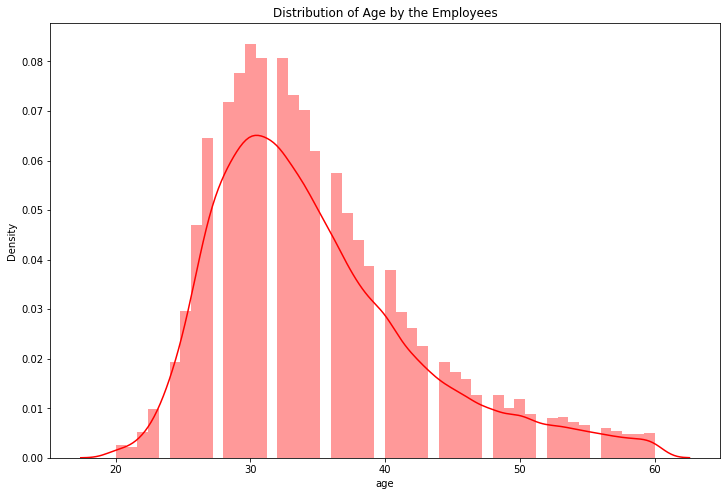

In [ ]:
plt.figure(figsize=(12,8))
sns.distplot(data_train['age'],color='r')
plt.title('Distribution of Age by the Employees')
plt.show()



*  From my research age will aslo play a crucial role in promoting so we can see that the company has more employees in the age range 25-38 who are young and hardworking.

*   The data is near to normal but due to less employees in the higher age groups it is likely to be Right Skewed





/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40]),
 <a list of 41 Text major ticklabel objects>)

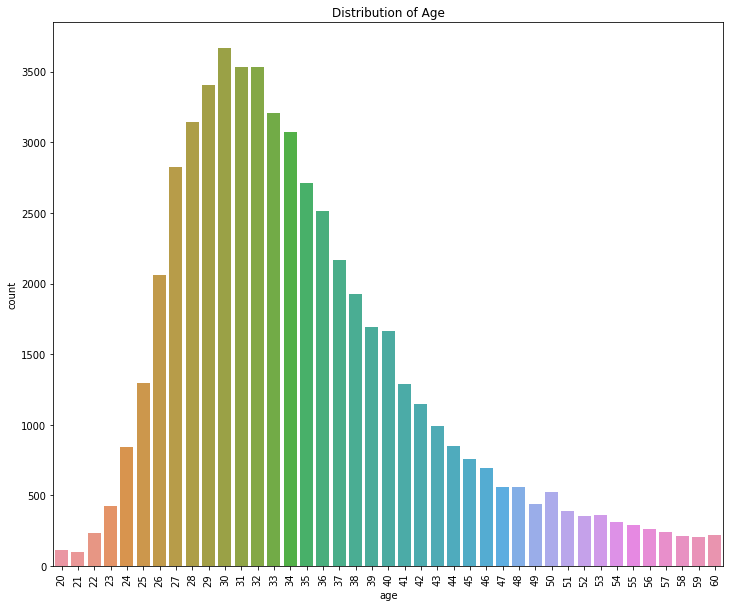

In [ ]:
plt.figure(figsize=(12,10))
sns.countplot(data_train.age)
plt.title('Distribution of Age')
plt.xticks(rotation=90)

Text(0.5, 1.0, 'Distribution of Age')

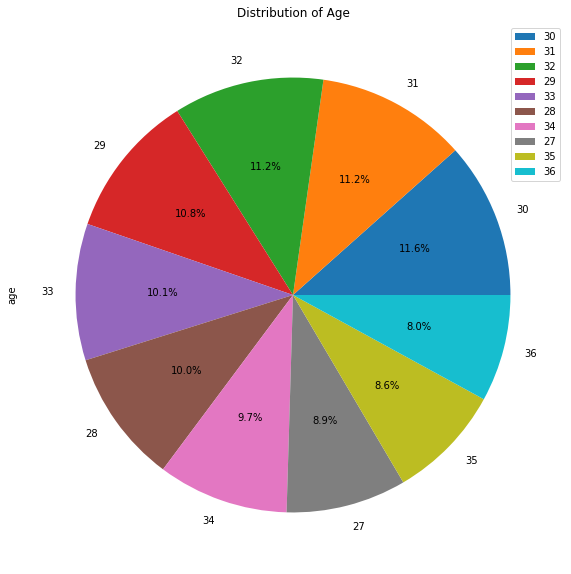

In [ ]:
data_train["age"].value_counts().head(10).plot(kind = 'pie', autopct='%1.1f%%', figsize=(10, 10), startangle=0).legend()
plt.title('Distribution of Age')



*   In the age, most ages are between 27 to 36 years.



# Previous_Year_Rating Distribution

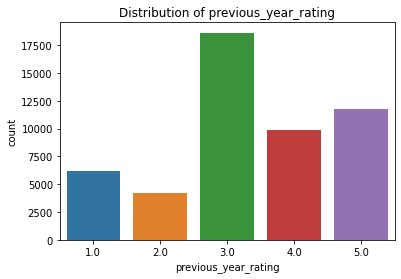

In [ ]:
sns.countplot(data= data_train, x = "previous_year_rating")
plt.title('Distribution of previous_year_rating')
plt.show()

Text(0.5, 1.0, 'Distribution of previous_year_rating')

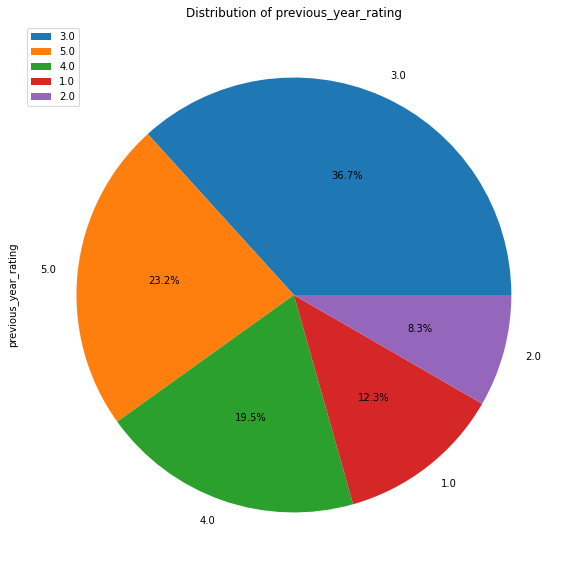

In [ ]:
data_train["previous_year_rating"].value_counts().head(7).plot(kind = 'pie', autopct='%1.1f%%', figsize=(10, 10), startangle=0).legend()
plt.title('Distribution of previous_year_rating')



*   Rating 3 is most used for the employees in all data with 36%. 5 rating with 23%



# Length_of_Service Distribution

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34]), <a list of 35 Text major ticklabel objects>)

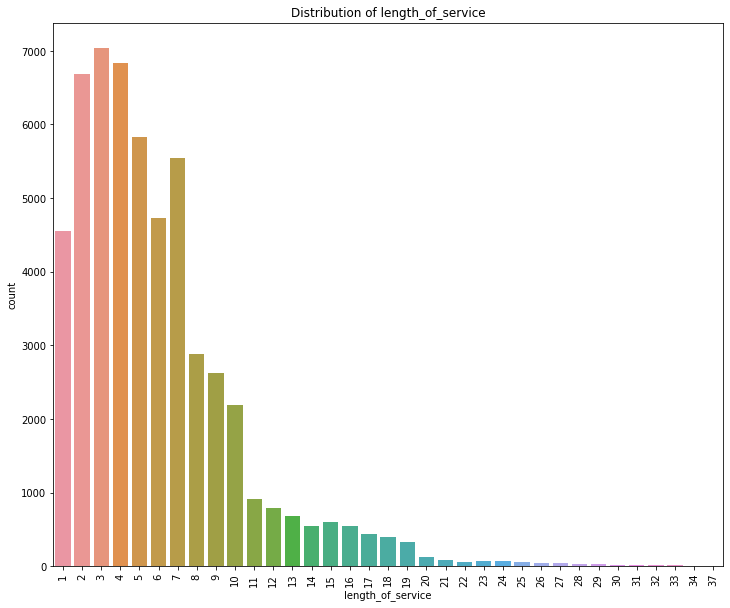

In [ ]:
plt.figure(figsize=(12,10))
sns.countplot(data_train.length_of_service)
plt.title('Distribution of length_of_service')
plt.xticks(rotation=90)

Text(0.5, 1.0, 'Distribution of length_of_service')

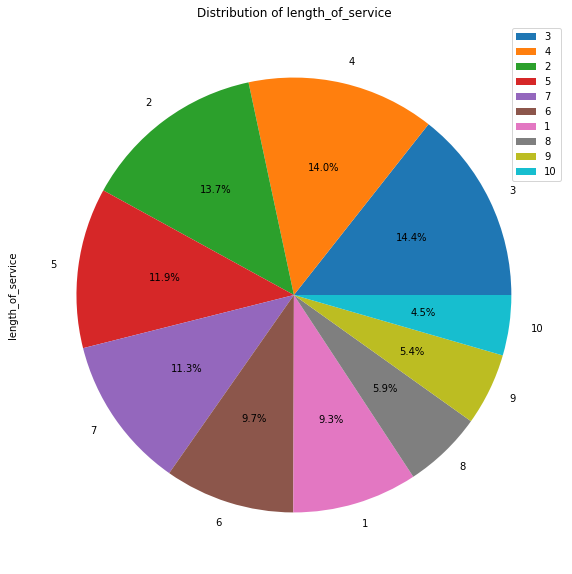

In [ ]:
data_train["length_of_service"].value_counts().head(10).plot(kind = 'pie', autopct='%1.1f%%', figsize=(10, 10), startangle=0).legend()
plt.title('Distribution of length_of_service')



*   Length of service is from 1 to 10 years. After 10 years, there are few employees.



# Awards_Won Distribution

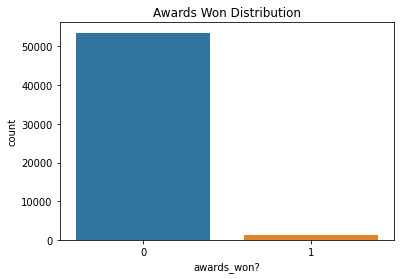

In [ ]:
sns.countplot(data= data_train, x = "awards_won?")
plt.title('Awards Won Distribution')
plt.show()

Text(0.5, 1.0, 'Awards Won Distribution')

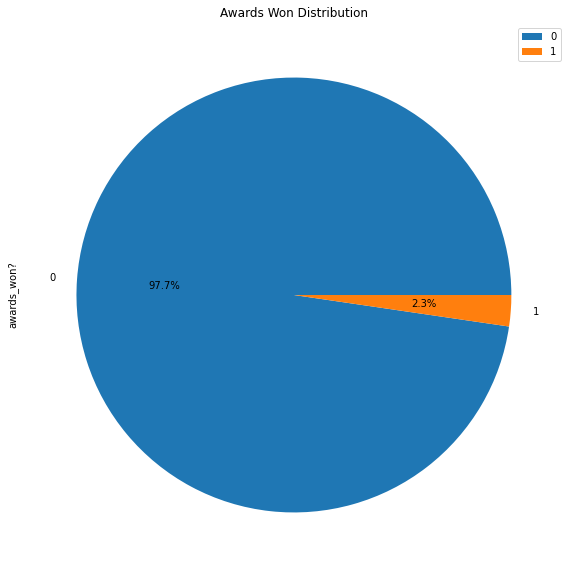

In [ ]:
data_train["awards_won?"].value_counts().head(7).plot(kind = 'pie', autopct='%1.1f%%', figsize=(10, 10), startangle=0).legend()
plt.title('Awards Won Distribution')



*   Only 2.3% employees won the awards and 97.7% did not won. Looking at awards, its very less ratio.



# KPIs_met >80% Distribution

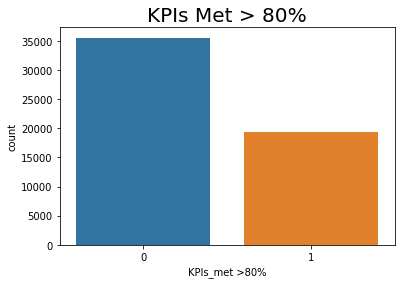

In [ ]:
sns.countplot(data= data_train, x = "KPIs_met >80%")
plt.title('KPIs Met > 80%', fontsize = 20)
plt.show()

Text(0.5, 1.0, 'KPIs Met > 80%')

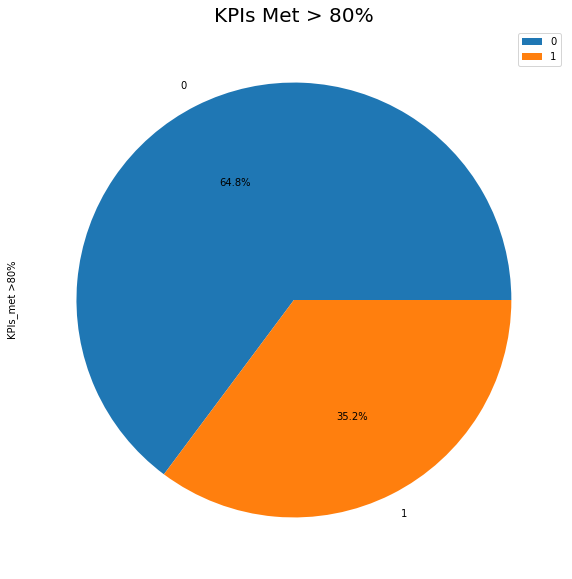

In [ ]:
data_train["KPIs_met >80%"].value_counts().head(7).plot(kind = 'pie', autopct='%1.1f%%', figsize=(10, 10), startangle=0).legend()
plt.title('KPIs Met > 80%', fontsize = 20)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


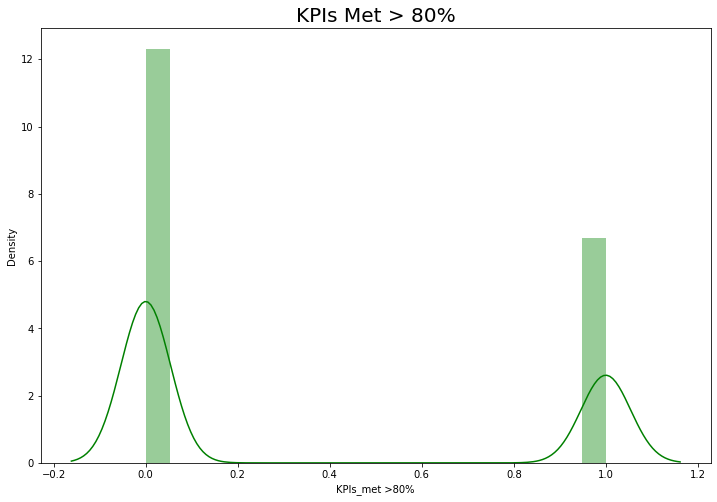

In [ ]:
plt.figure(figsize=(12,8))
sns.distplot(data_train['KPIs_met >80%'],color='g')
plt.title('KPIs Met > 80%', fontsize = 20)
plt.show()

# Avg_Training_Score Distribution

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60]),
 <a list of 61 Text major ticklabel objects>)

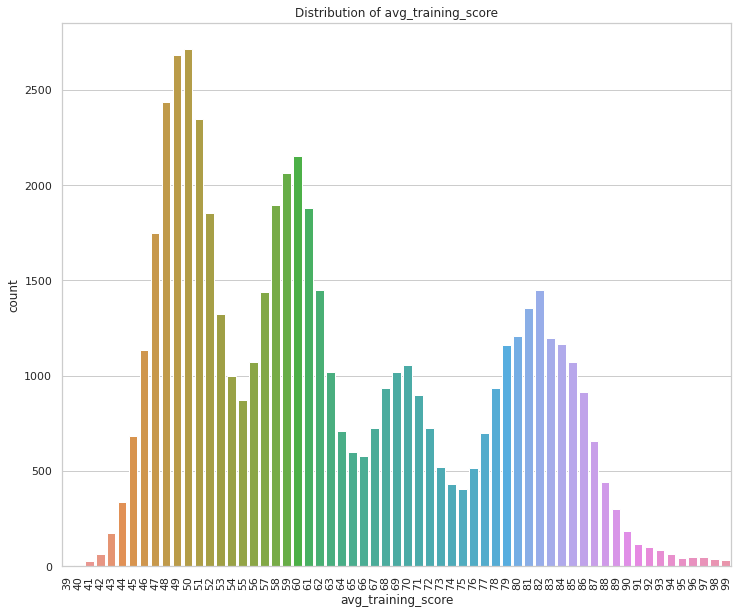

In [ ]:
plt.figure(figsize=(12,10))
sns.countplot(data_train.avg_training_score)
plt.title('Distribution of avg_training_score')
plt.xticks(rotation=90)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


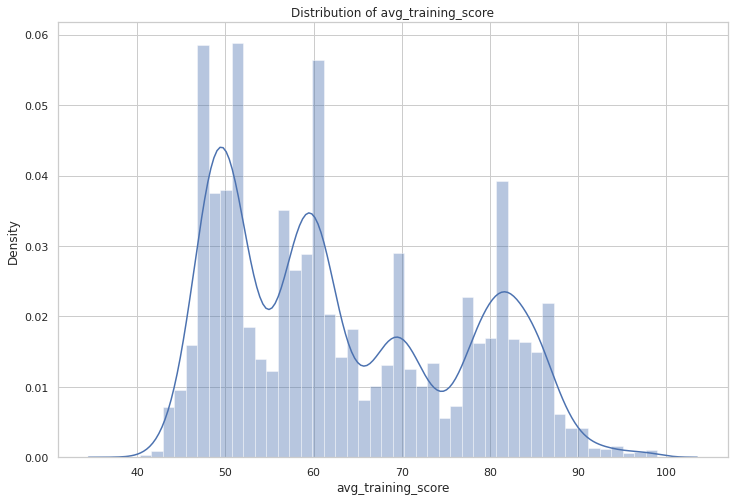

In [ ]:
plt.figure(figsize=(12,8))
sns.distplot(data_train['avg_training_score'],color='b')
plt.title('Distribution of avg_training_score')
plt.show()

Text(0.5, 1.0, 'Distribution of avg_training_score')

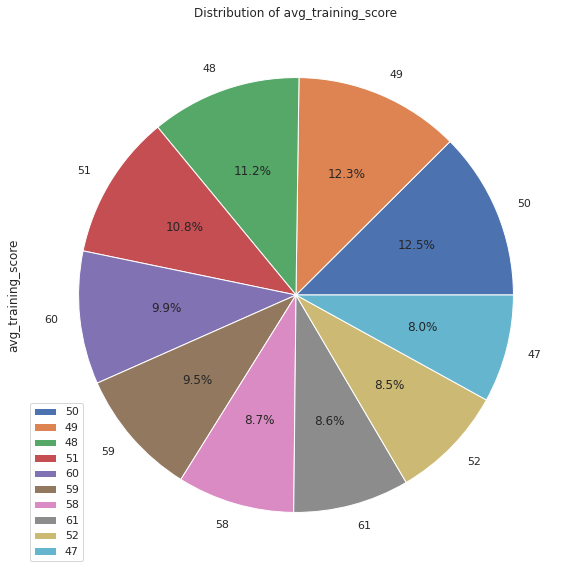

In [ ]:
data_train["avg_training_score"].value_counts().head(10).plot(kind = 'pie', autopct='%1.1f%%', figsize=(10, 10), startangle=0).legend()
plt.title('Distribution of avg_training_score')



*   The average training score is the average of all the training scores obtained so it is ranging from 40-100 and has different peaksa as it is average of all the scores.



# Is_Promoted Distribution

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


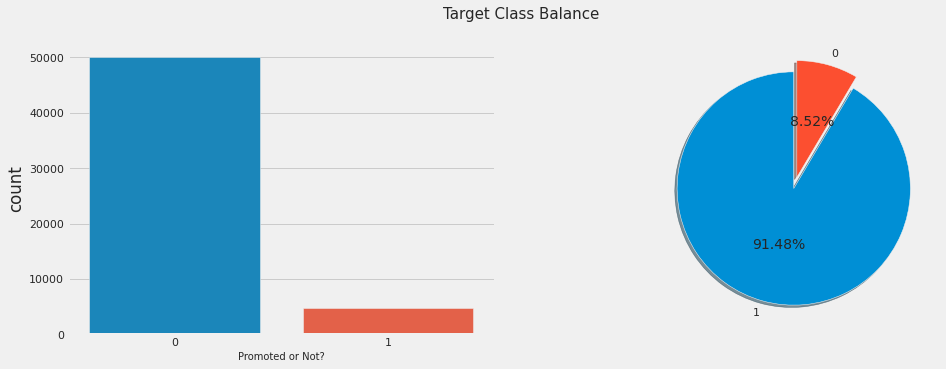

In [ ]:
# lets check the Target
plt.rcParams['figure.figsize'] = (15, 5)
plt.style.use('fivethirtyeight')

plt.subplot(1, 2, 1)
sns.countplot(data_train['is_promoted'],)

plt.xlabel('Promoted or Not?', fontsize = 10)

plt.subplot(1, 2, 2)
data_train['is_promoted'].value_counts().plot(kind = 'pie', explode = [0, 0.1], autopct = '%.2f%%', startangle = 90,
                                       labels = ['1','0'], shadow = True, pctdistance = 0.5)
plt.axis('off')

plt.suptitle('Target Class Balance', fontsize = 15)
plt.show()



*   As we can easily, see that the Target Class is Highly Imbalanced, and we must balance these classes of Target Class. Most of the Times, when we use Machine Learning Models with Imbalanced Classes, we have very poor Results which are completely biased towards the class having Higher Distribution.

*   We can see the data inbalance the number of promoted people is very less when compared to non promoted people and this is gonna be a challenge in modeling





In [ ]:
data_train["is_promoted"].value_counts()

0    50140
1     4668
Name: is_promoted, dtype: int64



*   We can clearly see that, the data is not balanced. The promoted employees are only 4668 and not promoted employees are 50140. 91% and 9% ratio is very unbalanced.



# **Categorical Features**

# *Department Distribution*

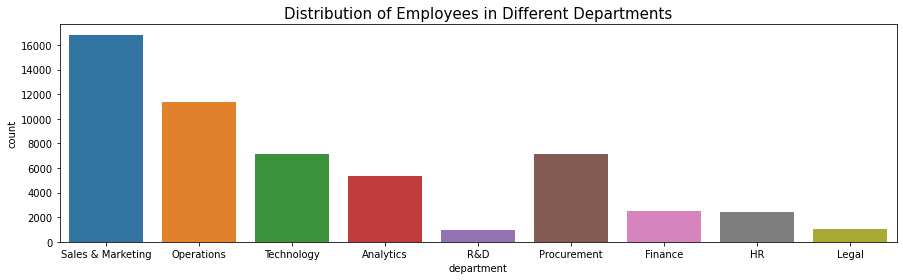

In [ ]:
import seaborn as sns 
sns.countplot(data= data_train, x = "department")
plt.title('Distribution of Employees in Different Departments', fontsize = 15)
plt.show()

Text(0.5, 1.0, 'Department Distribution ')

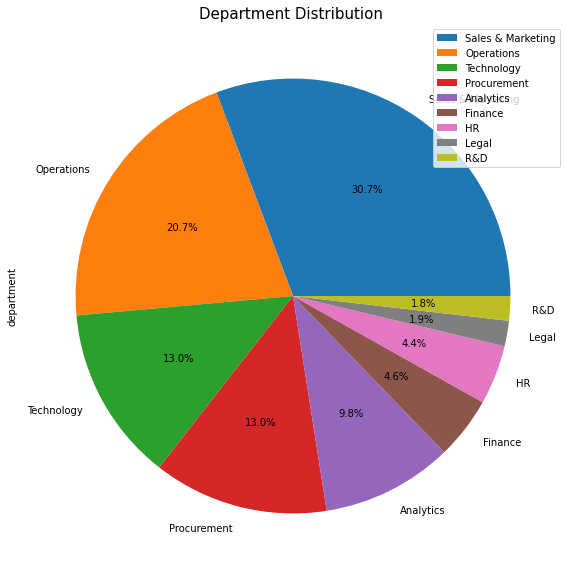

In [ ]:
data_train["department"].value_counts().head(10).plot(kind = 'pie', autopct='%1.1f%%', figsize=(10, 10)).legend()
plt.title('Department Distribution ', fontsize = 15)

We can see that, Sales and marketing department employees data is more than other departments. Its 30% in whole data and on the second number, Oprations department is 20%.

In [ ]:
data_train.columns

Index(['department', 'region', 'education', 'gender', 'recruitment_channel',
       'no_of_trainings', 'age', 'previous_year_rating', 'length_of_service',
       'KPIs_met >80%', 'awards_won?', 'avg_training_score', 'is_promoted'],
      dtype='object')

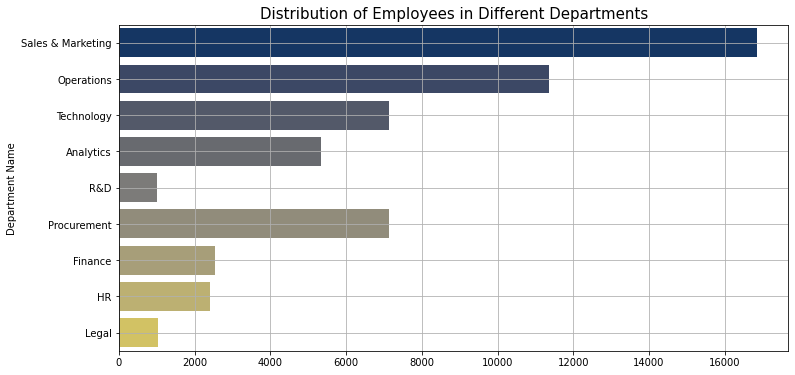

In [ ]:
# lets check different Departments

plt.rcParams['figure.figsize'] = (12, 6)
sns.countplot(y = data_train['department'], palette = 'cividis', orient = 'v')
plt.xlabel('')
plt.ylabel('Department Name')
plt.title('Distribution of Employees in Different Departments', fontsize = 15)
plt.grid()

plt.show()

# Gender Distribution



*   Variation of promotion percentage with respect to gender



In [ ]:
pd.crosstab(data_train.gender,data_train.is_promoted,normalize='index')

is_promoted,0,1
gender,,
f,0.910066,0.089934
m,0.916849,0.083151




*   There is major differnce in percentages across genders too.



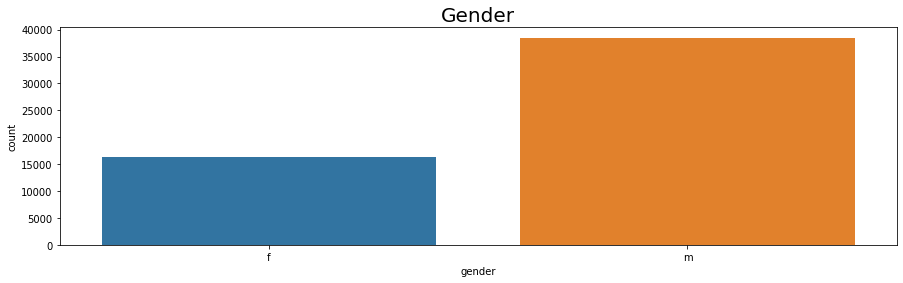

In [ ]:
sns.countplot(data= data_train, x = "gender")
plt.title('Gender', fontsize = 20)
plt.show()

Text(0.5, 1.0, 'Gender')

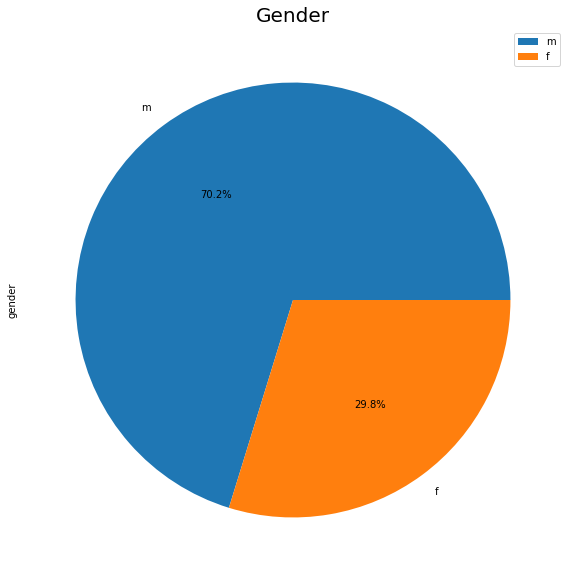

In [ ]:
data_train["gender"].value_counts().head(7).plot(kind = 'pie', autopct='%1.1f%%', figsize=(10, 10), startangle=0).legend()
plt.title('Gender', fontsize = 20)



*   If we look at the gender, males are too much again with amlost 38K data and females 16K



# Region Distribution

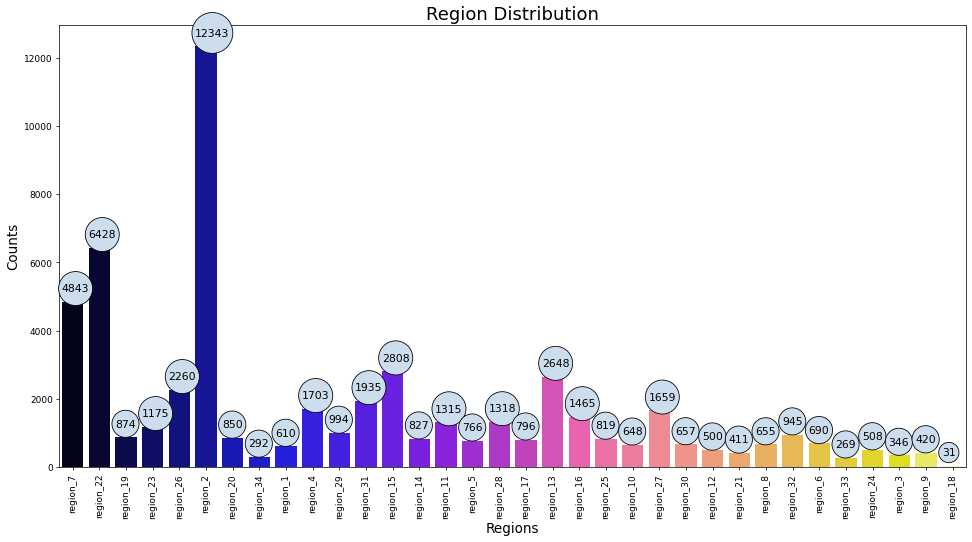

In [ ]:
plt.figure(figsize=(18,9),dpi=65)
gp=sns.countplot(x=data_train['region'],palette='gnuplot2')
for p in gp.patches:
    value=p.get_height() 
    if value <0:
        continue
    x = p.get_x()
    y = p.get_y() + p.get_height()+ 300
    gp.text((x), (y), (value), fontsize=12,bbox=dict(facecolor='#ccddee', edgecolor='black', boxstyle='circle', linewidth=0.9))
plt.xlabel('Regions',size=15)
plt.ylabel('Counts',size=15)
plt.title('Region Distribution',size=20)
plt.xticks(rotation=90);

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]),
 <a list of 34 Text major ticklabel objects>)

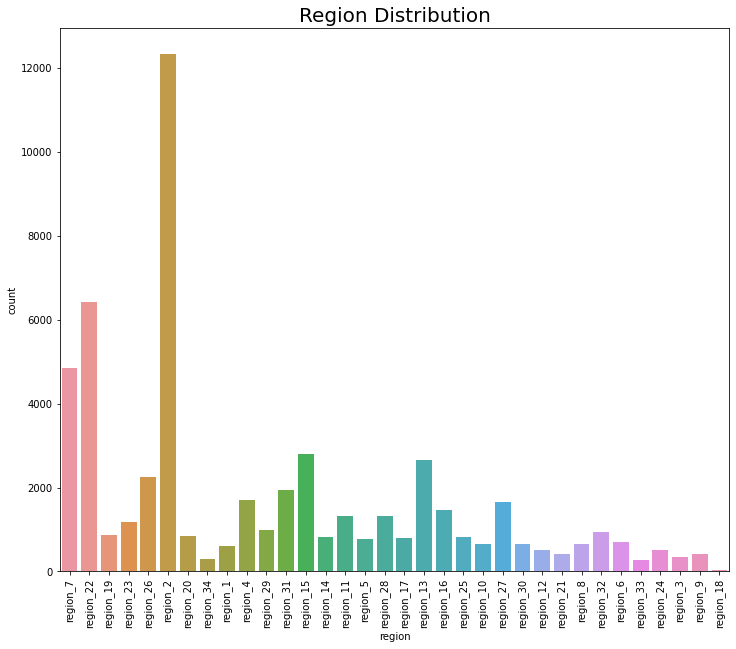

In [ ]:
plt.figure(figsize=(12,10))
sns.countplot(data_train.region)
plt.title('Region Distribution',size=20)
plt.xticks(rotation=90)

Text(0.5, 1.0, 'Region Distribution')

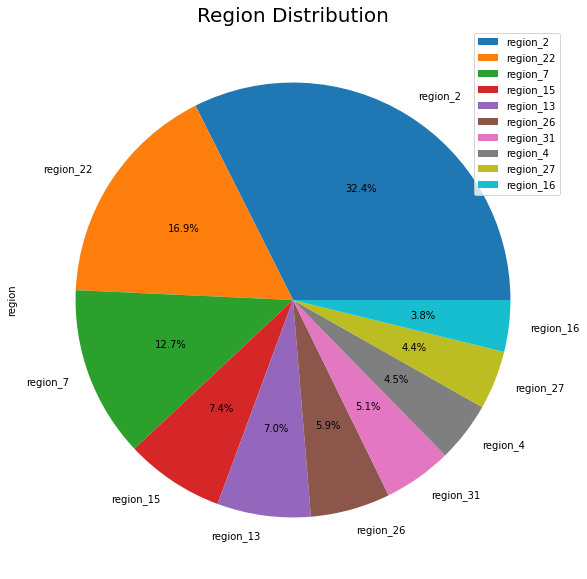

In [ ]:
data_train["region"].value_counts().head(10).plot(kind = 'pie', autopct='%1.1f%%', figsize=(10, 10), startangle=0).legend()
plt.title('Region Distribution',size=20)

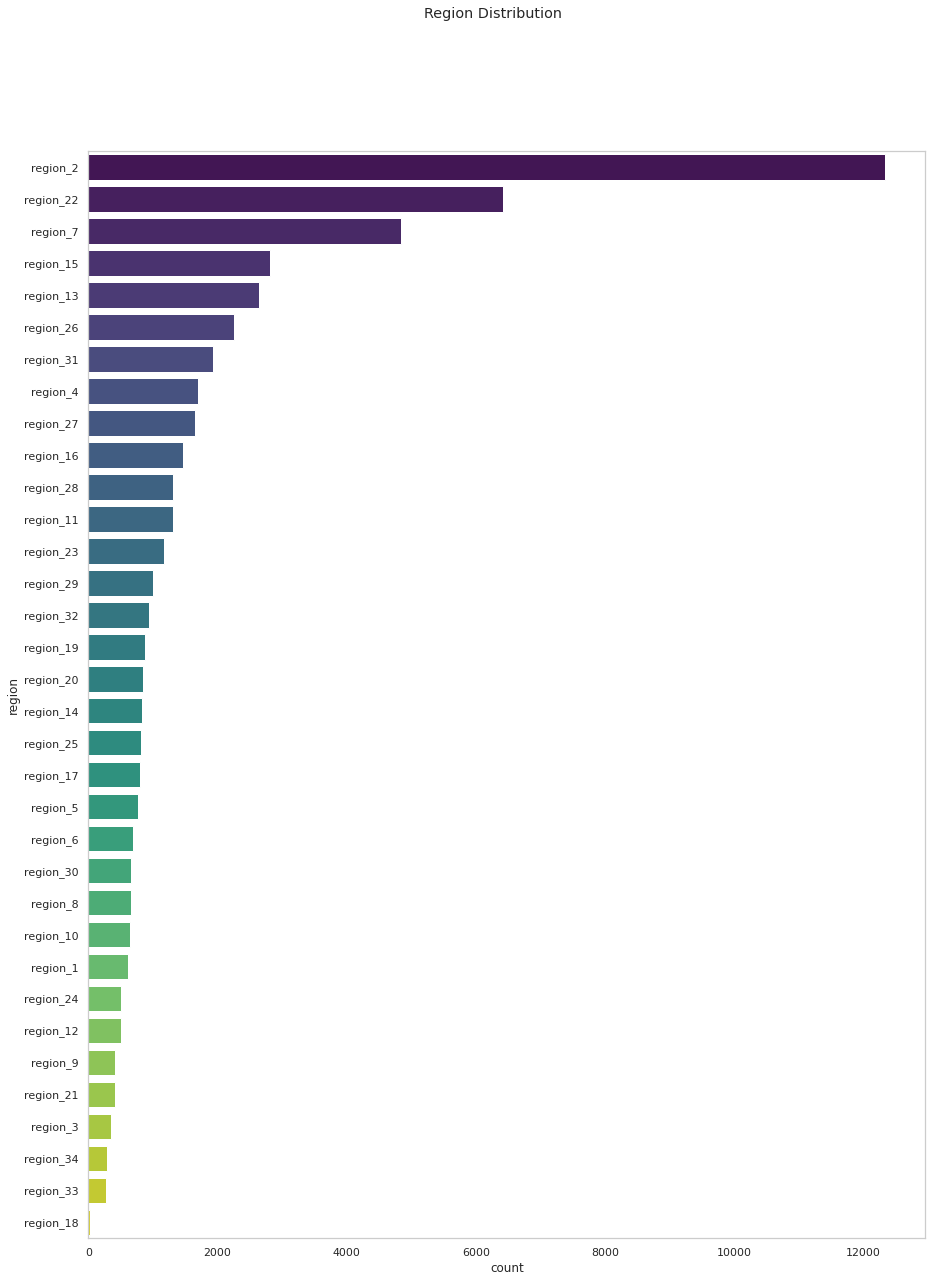

In [ ]:
plt.figure(figsize=(15,20))
ax = sns.countplot(y="region",data=data_train, 
                    palette="viridis", order = data_train['region'].value_counts().index)
ax.grid(False)
sns.set(style="whitegrid")
plt.suptitle("Region Distribution")
plt.show()



*   If we look at the region, region_2 is more in counts with 32% and region_22 is 16% and region_7 is 12%. It means that these three regions cover almost 60% data



# Education Distribution

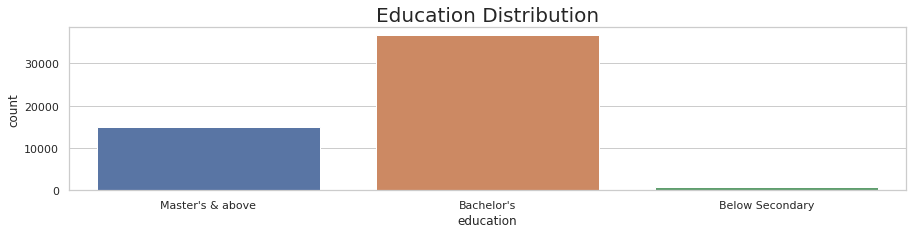

In [ ]:
sns.countplot(data= data_train, x = "education")
plt.title('Education Distribution',size=20)
plt.show()

Text(0.5, 1.0, 'Education Distribution')

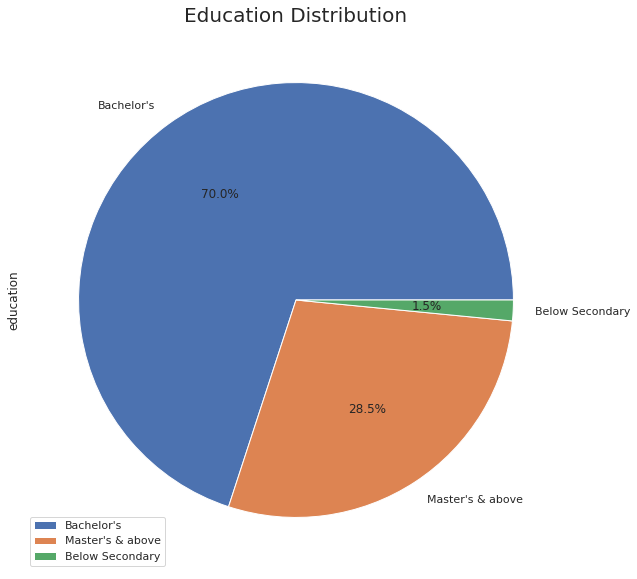

In [ ]:
data_train["education"].value_counts().head(7).plot(kind = 'pie', autopct='%1.1f%%', figsize=(10, 10), startangle=0).legend()
plt.title('Education Distribution',size=20)



*   If we look at the education of employees, Bacherlors are too much with 70% data, 28% Master and 1.5 below secondary education



# Recruitment_Channel Distribution



*   Variation of promotion percentage with recruitment channel that they have come from



In [ ]:
pd.crosstab(data_train.recruitment_channel,data_train.is_promoted,normalize='index')

is_promoted,0,1
recruitment_channel,,
other,0.916048,0.083952
referred,0.879159,0.120841
sourcing,0.914987,0.085013




*   According to the data, percentage of promotions is higher among the employees who got recruited through referrals.



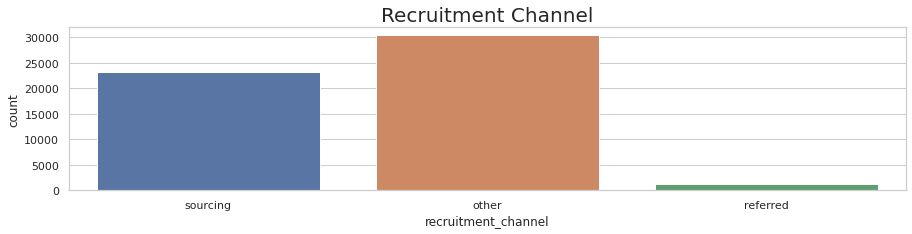

In [ ]:
sns.countplot(data= data_train, x = "recruitment_channel")
plt.title('Recruitment Channel', fontsize = 20)
plt.show()

Text(0.5, 1.0, 'Recruitment Channel')

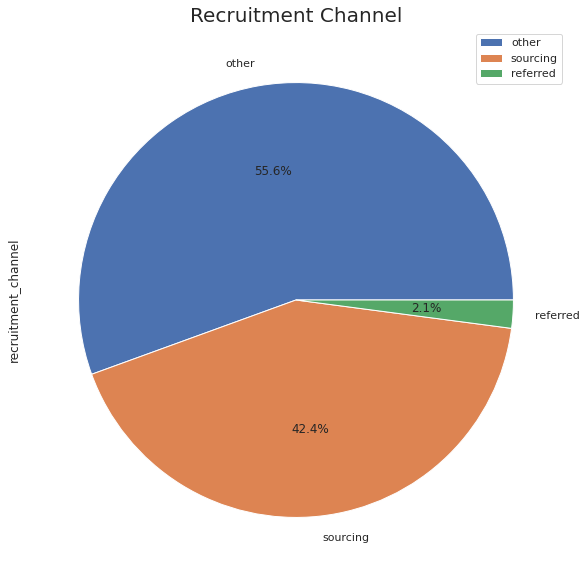

In [ ]:
data_train["recruitment_channel"].value_counts().head(7).plot(kind = 'pie', autopct='%1.1f%%', figsize=(10, 10), startangle=0).legend()
plt.title('Recruitment Channel', fontsize = 20)



*   In the recruitment_channel, other are 55%,referred cases are 2% and sourcing 42%



# **Bivariate Analysis**

Bivariate analysis is one of the simplest forms of quantitative analysis. It involves the analysis of two variables, for the purpose of determining the empirical relationship between them. Bivariate analysis can be helpful in testing simple hypotheses of association.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


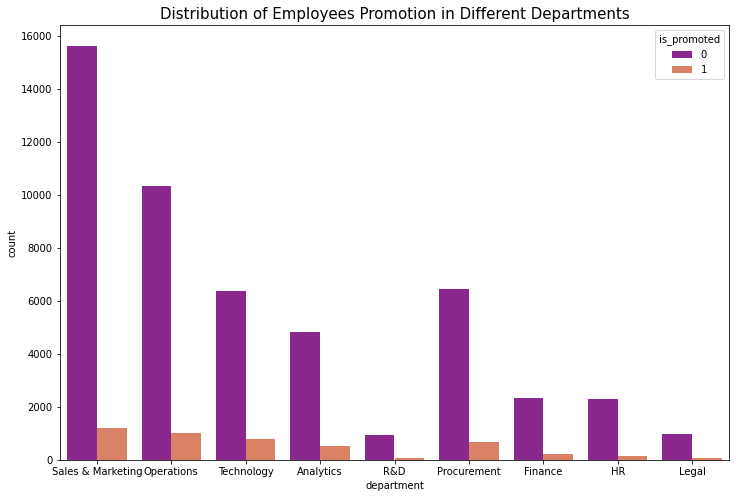

In [ ]:
# lets compare the effect of different Departments and Promotion

plt.figure(figsize=(12,8))
sns.countplot(data_train['department'],hue=data_train['is_promoted'],palette='plasma')
plt.title('Distribution of Employees Promotion in Different Departments', fontsize = 15)
plt.show()



*   As we can see most of the employees in the company are from sales& marketing, operations and procurement and these departments have more promotions but the ratios of promotions are very high so we can assume that competetion is very high for promotions in these departments




In [ ]:
# Define a function to plot stacked bar chart since there will be multiple stacked bars charts to plot

def create_stacked_bar(column_name):

    promo_by_group = pd.crosstab(index=data_train['is_promoted'],columns = data_train[column_name], normalize = 'columns')
    promo_by_group = promo_by_group.apply(lambda x: round(x,2))
    
    labels = promo_by_group.columns
    list1 = promo_by_group.iloc[0].to_list()
    list2 = promo_by_group.iloc[1].to_list()
    
    list1_name = "Not promoted"
    list2_name = "Promoted"
    title = f"Promotion by {column_name}"
    xlabel = column_name
    ylabel = "Promotion percentage"
    
    fig, ax = plt.subplots(figsize=(10, 5))
    bar_width = 0.5
    
    ax1 = ax.bar(labels,list1, bar_width, label = list1_name)
    ax2 = ax.bar(labels,list2, bar_width, bottom = list1, label = list2_name)

    ax.set_title(title, fontweight = "bold")
    ax.set_xlabel(xlabel, fontweight = "bold")
    ax.set_ylabel(ylabel, fontweight = "bold")
    ax.legend(loc="best")
    
    plt.xticks(list(range(len(labels))), labels,rotation=90)
    plt.yticks(fontsize=9)

    for r1, r2 in zip(ax1, ax2):
        h1 = r1.get_height()
        h2 = r2.get_height()
        plt.text(r1.get_x() + r1.get_width() / 2., h1 / 2., f"{h1:.0%}", ha="center", va="center", color="white", fontsize=9, fontweight="bold")
        plt.text(r2.get_x() + r2.get_width() / 2., h1 + h2 / 2., f"{h2:.0%}", ha="center", va="center", color="white", fontsize=9, fontweight="bold")

    plt.show()

In [ ]:
# Draw a hook with each column
def bar_chart(feature):
    promoted = data_train[data_train['is_promoted']==1][feature].value_counts()
    no_promoted = data_train[data_train['is_promoted']==0][feature].value_counts()
    df1 = pd.DataFrame([promoted,no_promoted])
    df1.index = ['Promoted','Not_promoted']
    df1.plot(kind='bar',stacked=True, figsize=(10,5))

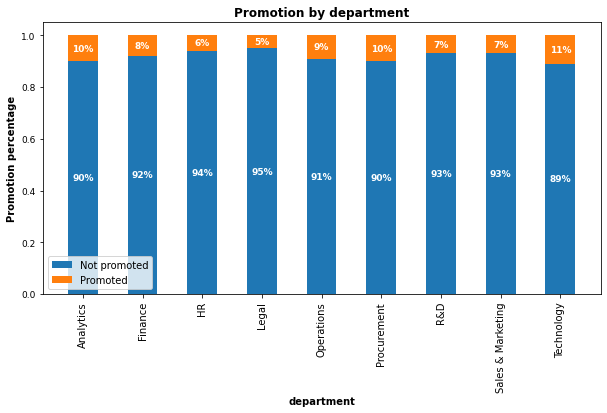

In [ ]:
# Plot a stacked bar chart to visualize promotion data by department

create_stacked_bar('department')



*   While Technology department had highest percentage of employees getting promoted, Legal department has the least number. But we don't see major differences in terms of percentages.



Text(0.5, 1.0, 'Distribution of Employees Promotion in Different Departments')

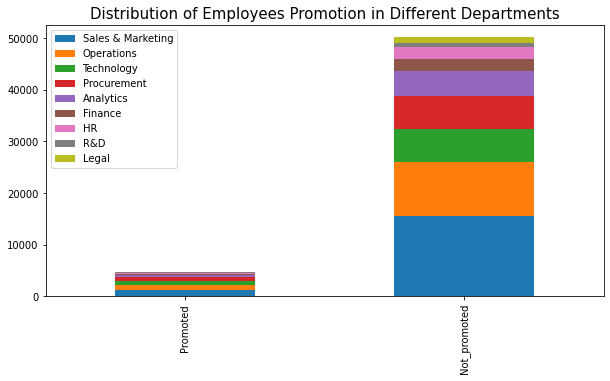

In [ ]:
bar_chart("department")
plt.title('Distribution of Employees Promotion in Different Departments', fontsize = 15)



*   From, the above chart we can see that almost all the Departments have a very similar effect on Promotion. So, we can consider that all the Departments have a similar effect on the promotion. Also, this column comes out to be lesser important in making a Machine Learning Model, as it does not contribute at all when it comes to Predicting whether the Employee should get Promotion.



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


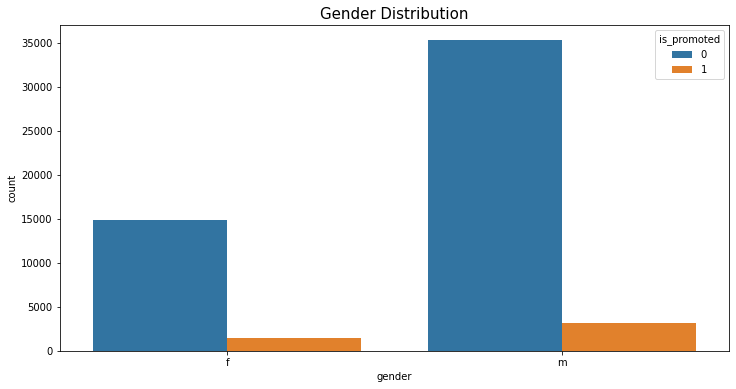

In [ ]:
# lets compare the effect of Gender and Promotion

plt.figure(figsize=(12,6))
sns.countplot(data_train['gender'],hue=data_train['is_promoted'])
plt.title('Gender Distribution', fontsize = 15)
plt.show()

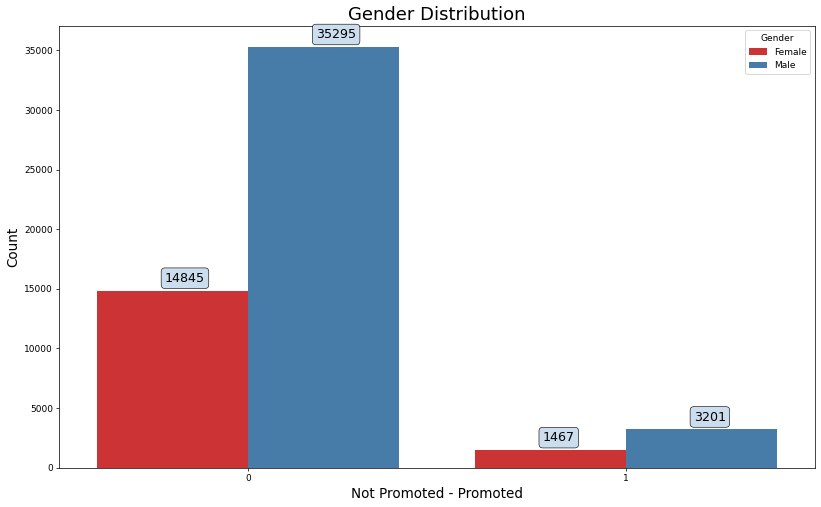

In [ ]:
plt.figure(figsize=(15,9),dpi=65)
gp=sns.countplot(data=data_train,x=data_train['is_promoted'],hue='gender',palette='Set1')
for p in gp.patches:
    value=p.get_height() 
    if value <0:
        continue
    x = p.get_x()+.18
    y = p.get_y() + p.get_height()+ 750
    gp.text((x), (y), int(value), fontsize=14,bbox=dict(facecolor='#ccddee', edgecolor='black', boxstyle='round', linewidth=0.65))
plt.ylabel('Count',size=15)
plt.xlabel('Not Promoted - Promoted',size=15)
plt.title('Gender Distribution',size=20)
plt.legend(title='Gender' ,labels=['Female', 'Male']);



---



*   Based on the bar plot above, we can see that more male employees are promoted than female employees. In addition, there are still more male employees who are not promoted than female employees.



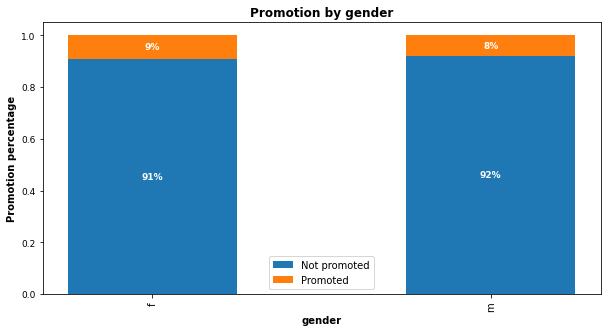

In [ ]:
# Plot the percentage of promotion data by gender

create_stacked_bar('gender')

Text(0.5, 1.0, 'Gender Distribution')

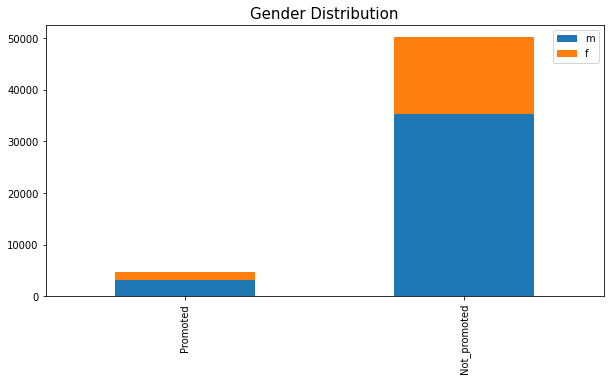

In [ ]:
bar_chart("gender")
plt.title('Gender Distribution', fontsize = 15)



*   As we have already seen that the Females are in Minority, but when it comes to Promotion, they are competing with their Men Counterparts neck-to-neck. That's a great Inference.



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


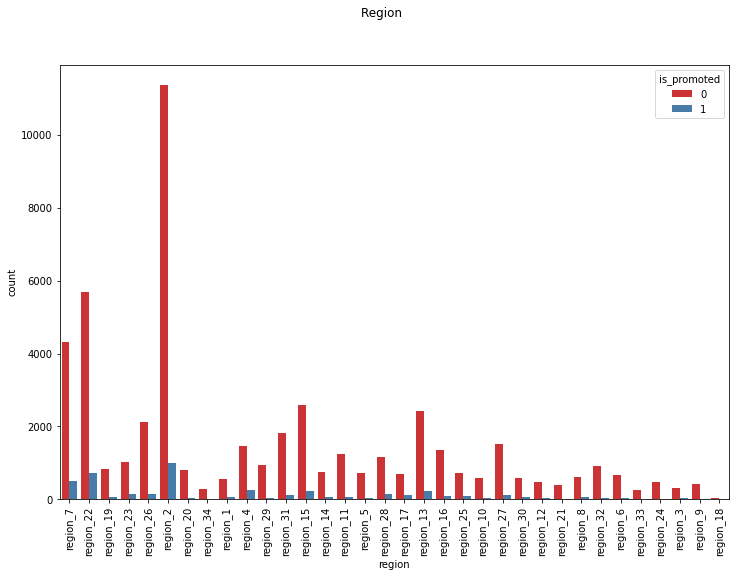

In [ ]:
plt.figure(figsize=(12,8))
sns.countplot(data_train['region'],hue=data_train['is_promoted'],palette='Set1')
plt.xticks(rotation=90)
plt.suptitle("Region ")
plt.show()



*   So we can see a Pattern here that is employees are more from the region-2 and most of the employees are promoted from this region.


*   region=7, region-22, region-2 have high promotions as there are more employees from this region.









In [ ]:
values=[]
for i in data_train['region'].unique():
    not_promoted=data_train[data_train['region']==i]['is_promoted'].value_counts()[0]
    promoted=data_train[data_train['region']==i]['is_promoted'].value_counts()[1]
    score=promoted/(promoted+not_promoted)
    values.append(score)

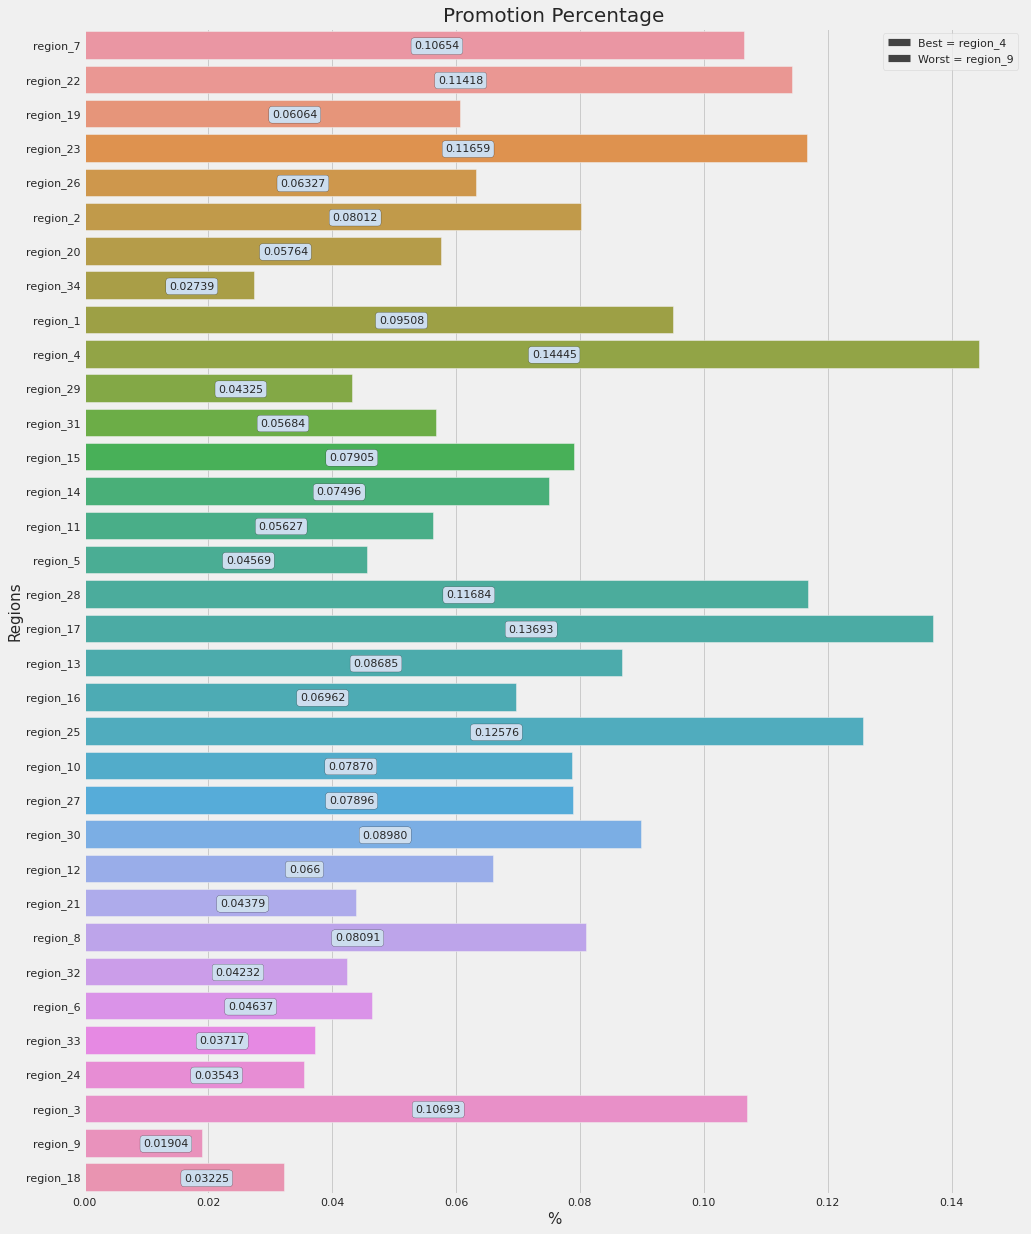

In [ ]:
plt.figure(figsize=(15,20))
gp=sns.barplot(y=data_train['region'].unique(),x=values)
for p in gp.patches:
    value=p.get_width() 
    if value <0:
        continue
    x = value/2
    y = p.get_y() + p.get_height()-.28
    gp.text((x), (y), str(value)[:7], fontsize=11,bbox=dict(facecolor='#ccddee', edgecolor='black', boxstyle='round', linewidth=0.2))
plt.title('Promotion Percentage',size=20)
plt.legend(loc='upper right' ,labels=['Best = region_4', 'Worst = region_9'])
plt.ylabel('Regions',size=15)
plt.xlabel('%',size=15);



*   Seems like region_4 has the highest rate.



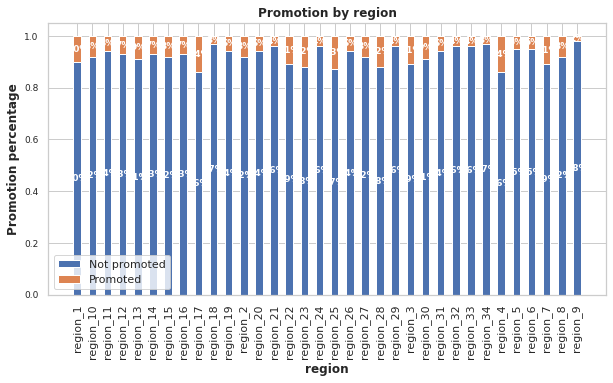

In [ ]:
# Plot the percentage of promotion data by region

create_stacked_bar('region')

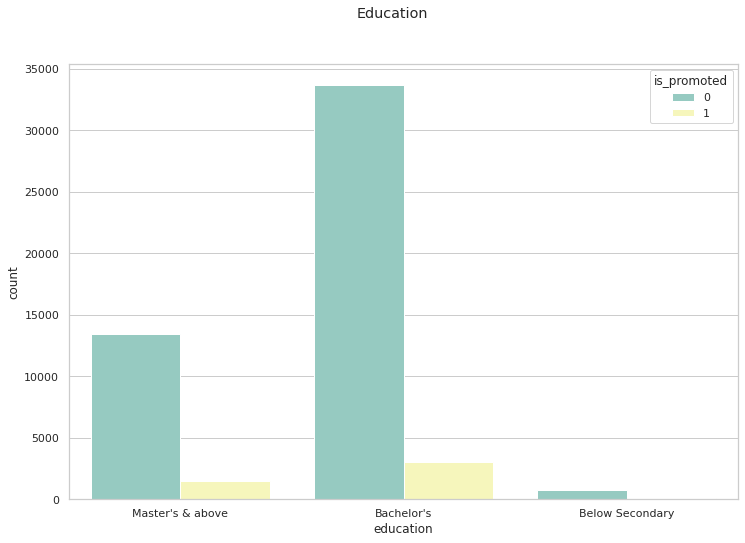

In [ ]:
# Plot the percentage of promotion data by education
plt.figure(figsize=(12,8))
sns.countplot(data_train['education'],hue=data_train['is_promoted'],palette='Set3')
plt.suptitle("Education")
plt.show()

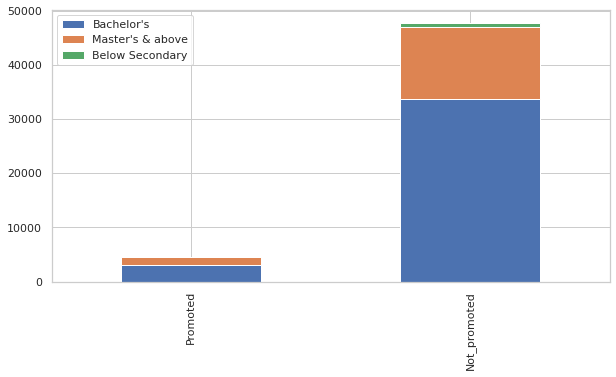

In [ ]:
bar_chart("education")

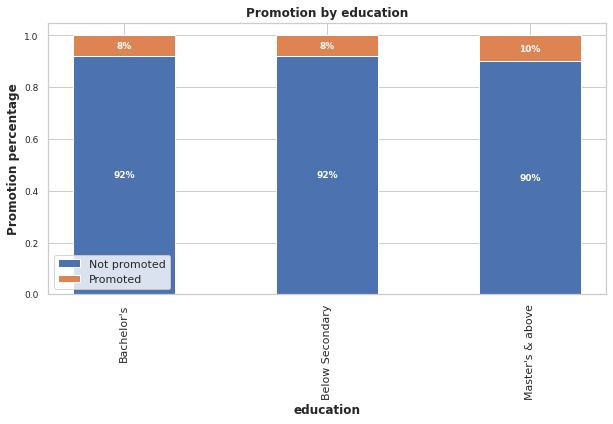

In [ ]:
# Plot the percentage of promotion data by education

create_stacked_bar('education')



*   As we can see the percentages are pretty much the same across different educational backgrounds.


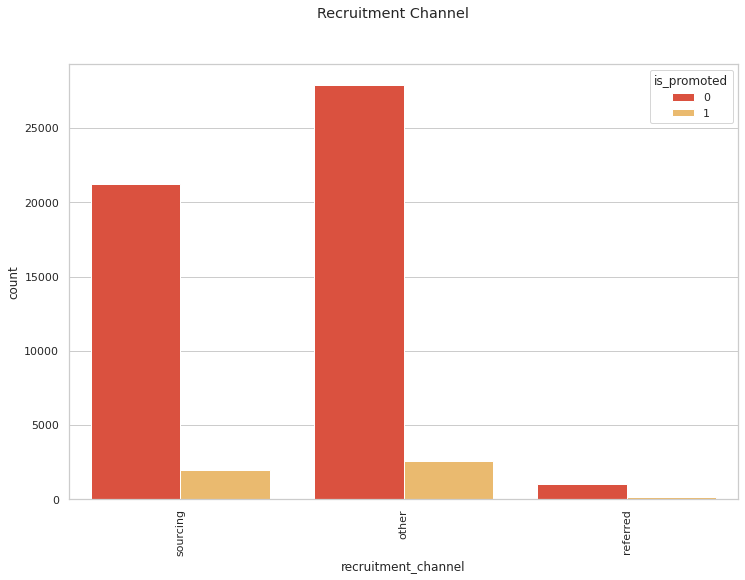

In [ ]:
# categorical features - recruitment_channel
plt.figure(figsize=(12,8))
sns.countplot(data_train['recruitment_channel'],hue=data_train['is_promoted'],palette='YlOrRd_r')
plt.suptitle("Recruitment Channel")
plt.xticks(rotation=90)
plt.show()



*   From the graph we can see that recruitment_channel is not influencing the promotions.



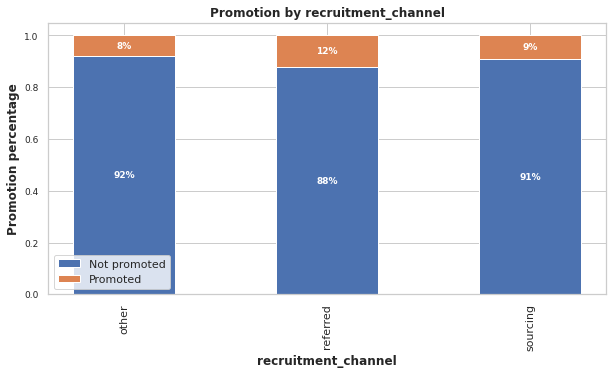

In [ ]:
# Plot a stacked bar chart to visualize promotion data by recruitment_channel

create_stacked_bar('recruitment_channel')



*   The Recruitment Channel, says that the Referred Employees are very less, i.e., most of the employees are recruited either by sourcing, or some other recruitment agencies, sources etc.



# **Numeric Features** 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


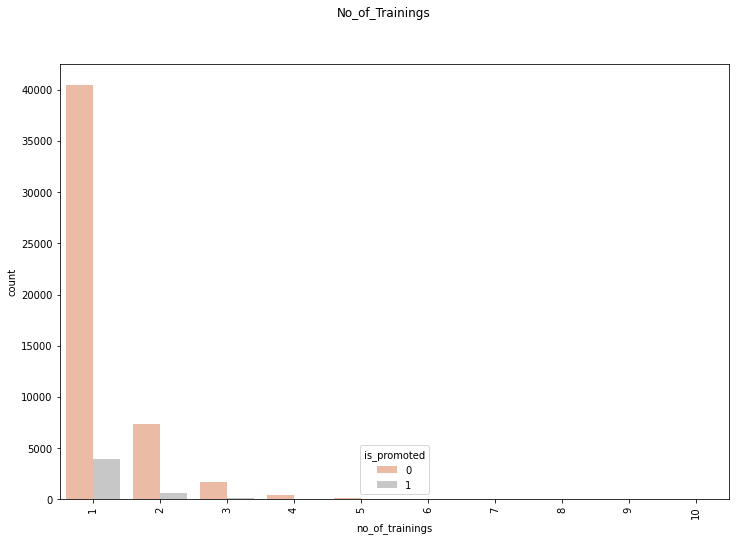

In [ ]:
#  no_of_trainings
plt.figure(figsize=(12,8))
sns.countplot(data_train['no_of_trainings'],hue=data_train['is_promoted'],palette='RdGy')
plt.xticks(rotation=90)
plt.suptitle("No_of_Trainings")
plt.show()



*   Based on the bar plot above, we can see that more employees who have attended training 1 time were not promoted than those who were promoted.



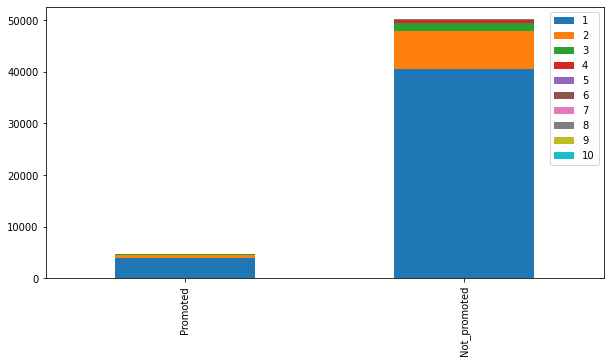

In [ ]:
bar_chart("no_of_trainings")

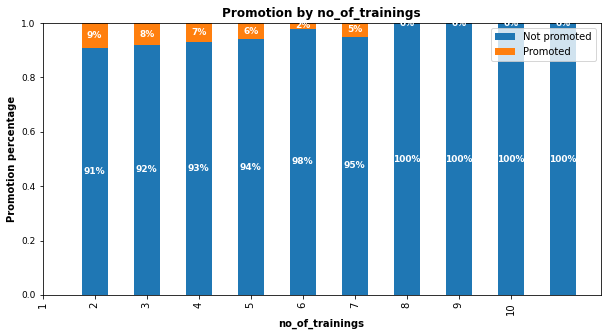

In [ ]:
# Plot a stacked bar chart to visualize promotion data by no_of_trainings

create_stacked_bar('no_of_trainings')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


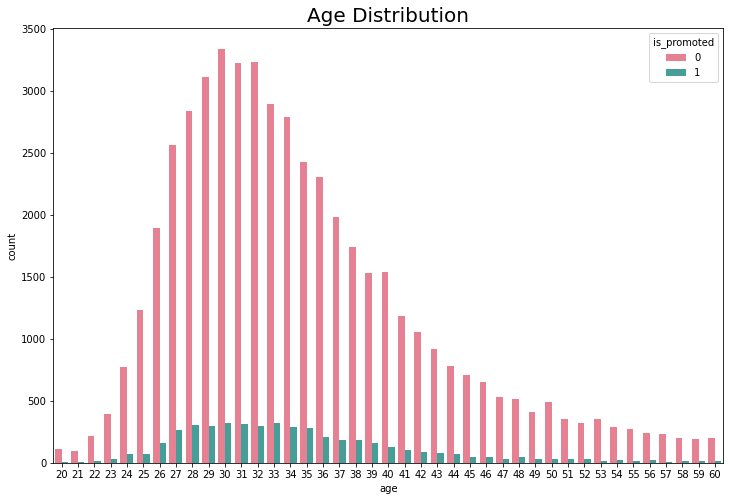

In [ ]:
#  age
plt.figure(figsize=(12,8))
sns.countplot(data_train['age'],hue=data_train['is_promoted'],palette='husl')
plt.title('Age Distribution',size=20)
plt.show()



*  Age groups 26-40 have most of the employees and promotions are also hig in this age groups.


*  The promotions are almost equal in the ages 30-34.





/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


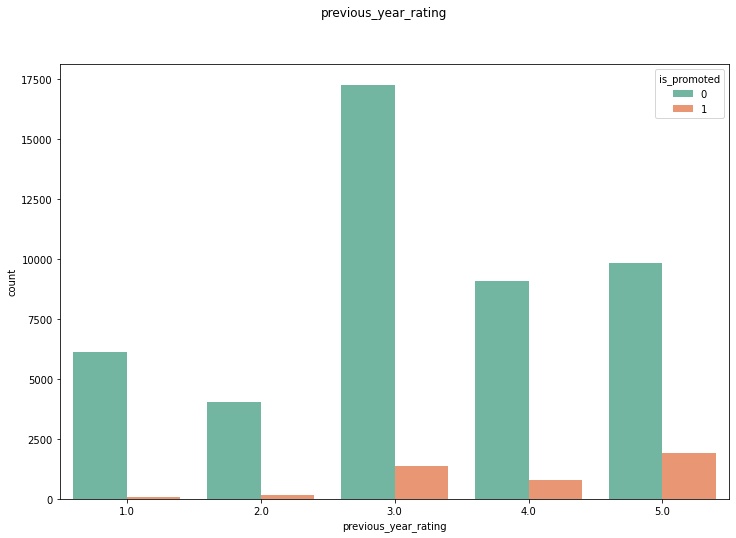

In [ ]:
plt.figure(figsize=(12,8))
sns.countplot(data_train['previous_year_rating'],hue=data_train['is_promoted'],palette='Set2')
plt.suptitle("previous_year_rating")
plt.show()



*   Employees who have a previous experice of 3 years and 5 years are high and they also have more number of promotions.

*   Based on the bar plot above, we can see that employees who get 3, good rating, and 5 are more likely to be promoted.





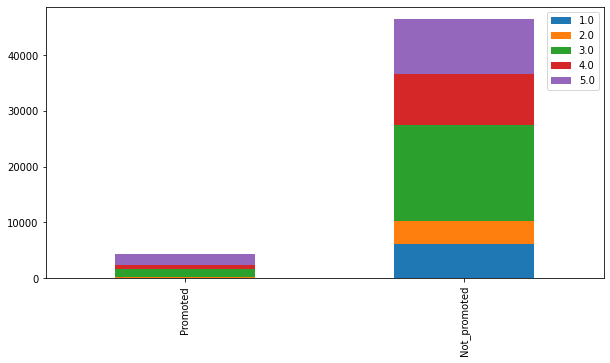

In [ ]:
bar_chart("previous_year_rating")

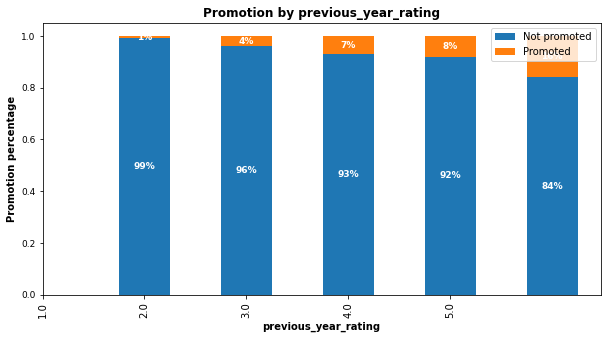

In [ ]:
# Plot a stacked bar chart to visualize promotion data by previous_year_rating

create_stacked_bar('previous_year_rating')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


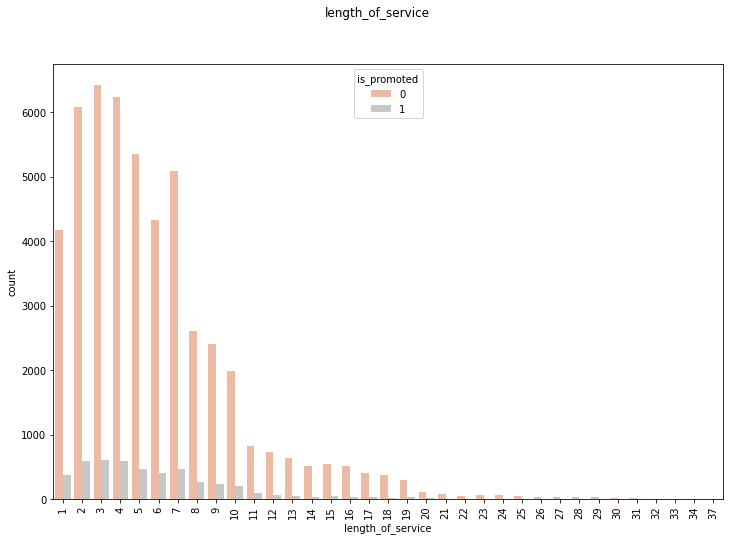

In [ ]:
# length_of_service

plt.figure(figsize=(12,8))
sns.countplot(data_train['length_of_service'],hue=data_train['is_promoted'],palette='RdGy')
plt.xticks(rotation=90)
plt.suptitle("length_of_service")
plt.show()



*   Based on the bar plot above, we can see that most of the promoted employees are in the range of 1-10 years of service.



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


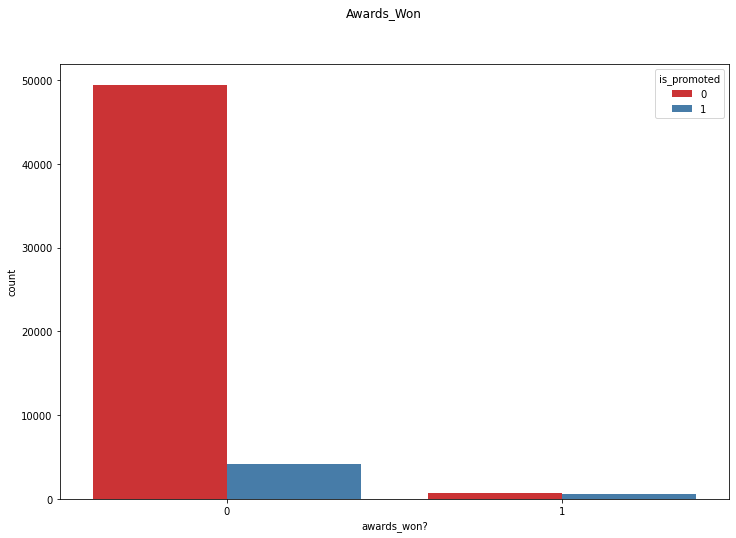

In [ ]:
# awards_won

plt.figure(figsize=(12,8))
sns.countplot(data_train['awards_won?'],hue=data_train['is_promoted'],palette='Set1')
plt.suptitle("Awards_Won")
plt.show()



*   As we can see almost all the employees who revcived an award in the pervious year have recieved a promotion.



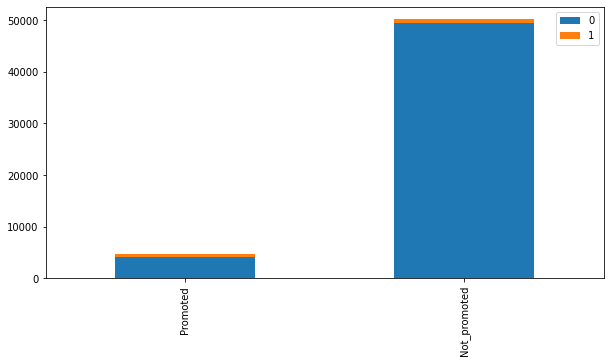

In [ ]:
bar_chart("awards_won?")

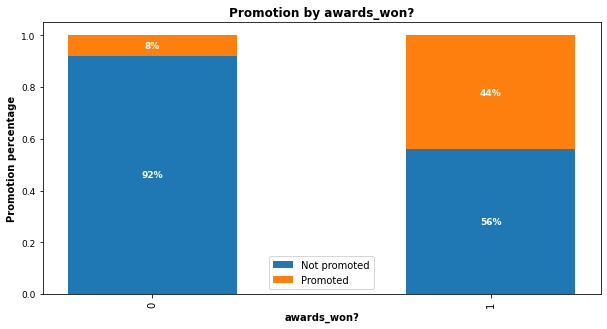

In [ ]:
# Plot the percentage of promotion data by awards_won

create_stacked_bar('awards_won?')



*   Based on the bar plot above, we can see that employees who have not received awards are promoted more than employees who have received awards.



In [ ]:
# Variation of promotion percentage with respect to KPIs met or not

pd.crosstab(data_train['KPIs_met >80%'],data_train.is_promoted,normalize='index')

is_promoted,0,1
KPIs_met >80%,,
0,0.960413,0.039587
1,0.830906,0.169094




*   Higher percentage of employees got promoted in the group of people whose KPIs_met is greater than 80%.



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


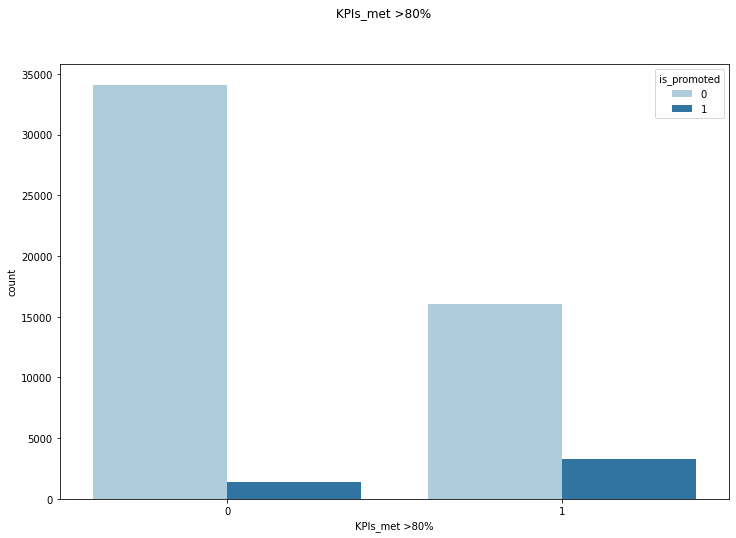

In [ ]:
# KPIs_met >80%
plt.figure(figsize=(12,8))
sns.countplot(data_train['KPIs_met >80%'],hue=data_train['is_promoted'],palette='Paired')
plt.suptitle("KPIs_met >80%")
plt.show()

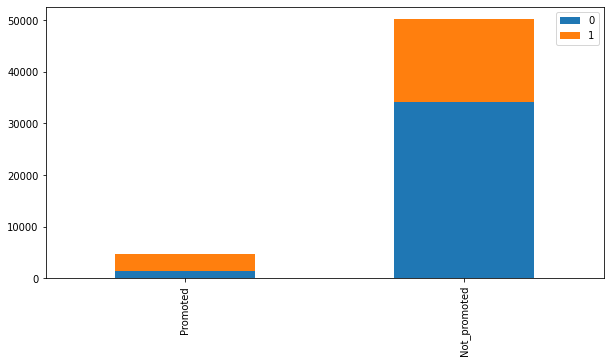

In [ ]:
bar_chart("KPIs_met >80%")

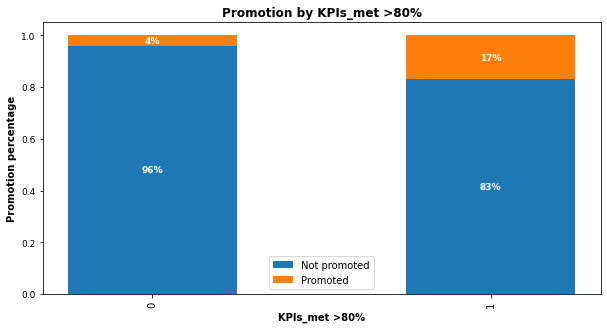

In [ ]:
# Plot the percentage of promotion data by KPIs_met >80%

create_stacked_bar('KPIs_met >80%')



*   Employees who have key performance indication more than 80% have more promotions when compared to normal key performance



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


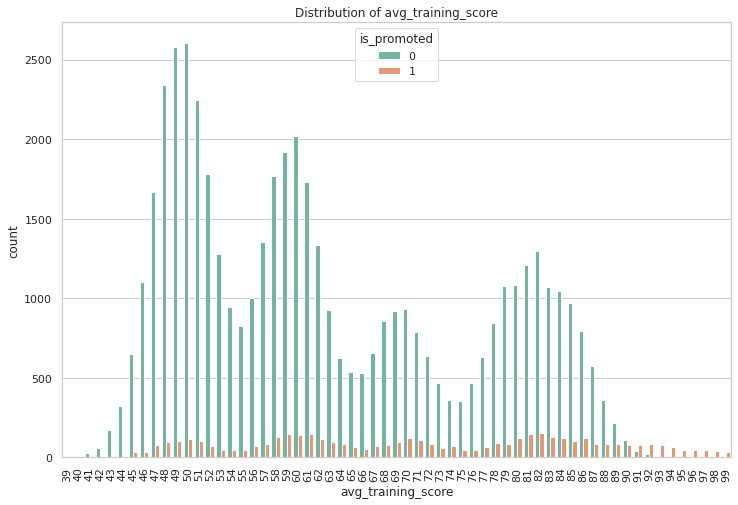

In [ ]:
plt.figure(figsize=(12,8))
sns.countplot(data_train['avg_training_score'],hue=data_train['is_promoted'],palette='Set2')
plt.xticks(rotation=90)
plt.title('Distribution of avg_training_score')
plt.show()


*   Here the promotions ar following the same pattern as of the averge training score it is difficult to predict if the person gets a promotion or not with a particular average score.

*   And the ratio of promotions with the average score above 90 percent is tremendeous everyone with the average score of 90 has recieved a promotion.




# **Multivariate Analysis**

Multivariate analysis is based on the principles of multivariate statistics, which involves observation and analysis of more than one statistical outcome variable at a time.



*   First, we will use the Correlation Heatmap to check the correlation between the Numerical Columns

*   Then we will check the ppscore or the Predictive Score to check the correlation between all the columns present in the data.

*   Then, we will use Bubble Charts, split Violin plots, Hue with Bivariate Plots.






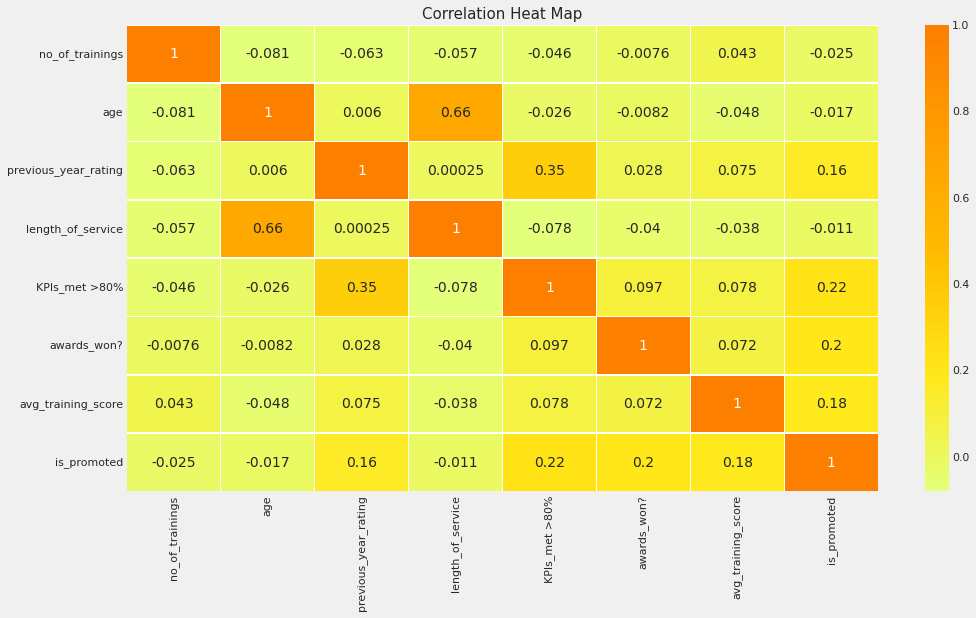

In [ ]:
# lets check the Heat Map for the Data with respect to correlation.

plt.rcParams['figure.figsize'] = (15, 8)
sns.heatmap(data_train.corr(), annot = True, linewidth = 0.5, cmap = 'Wistia')
plt.title('Correlation Heat Map', fontsize = 15)
plt.show()




*   Heatmap is used to show the corrleation between the columns this is very usefull for regression problems as one of the assumptions of linear model is that the features should not have correlation.


*   Here, we can see some obvious results, that is Length of Service, and Age are Highly Correlated, Also, KPIs, and Previous year rating are correlated to some extent, hinting that there is some relation.



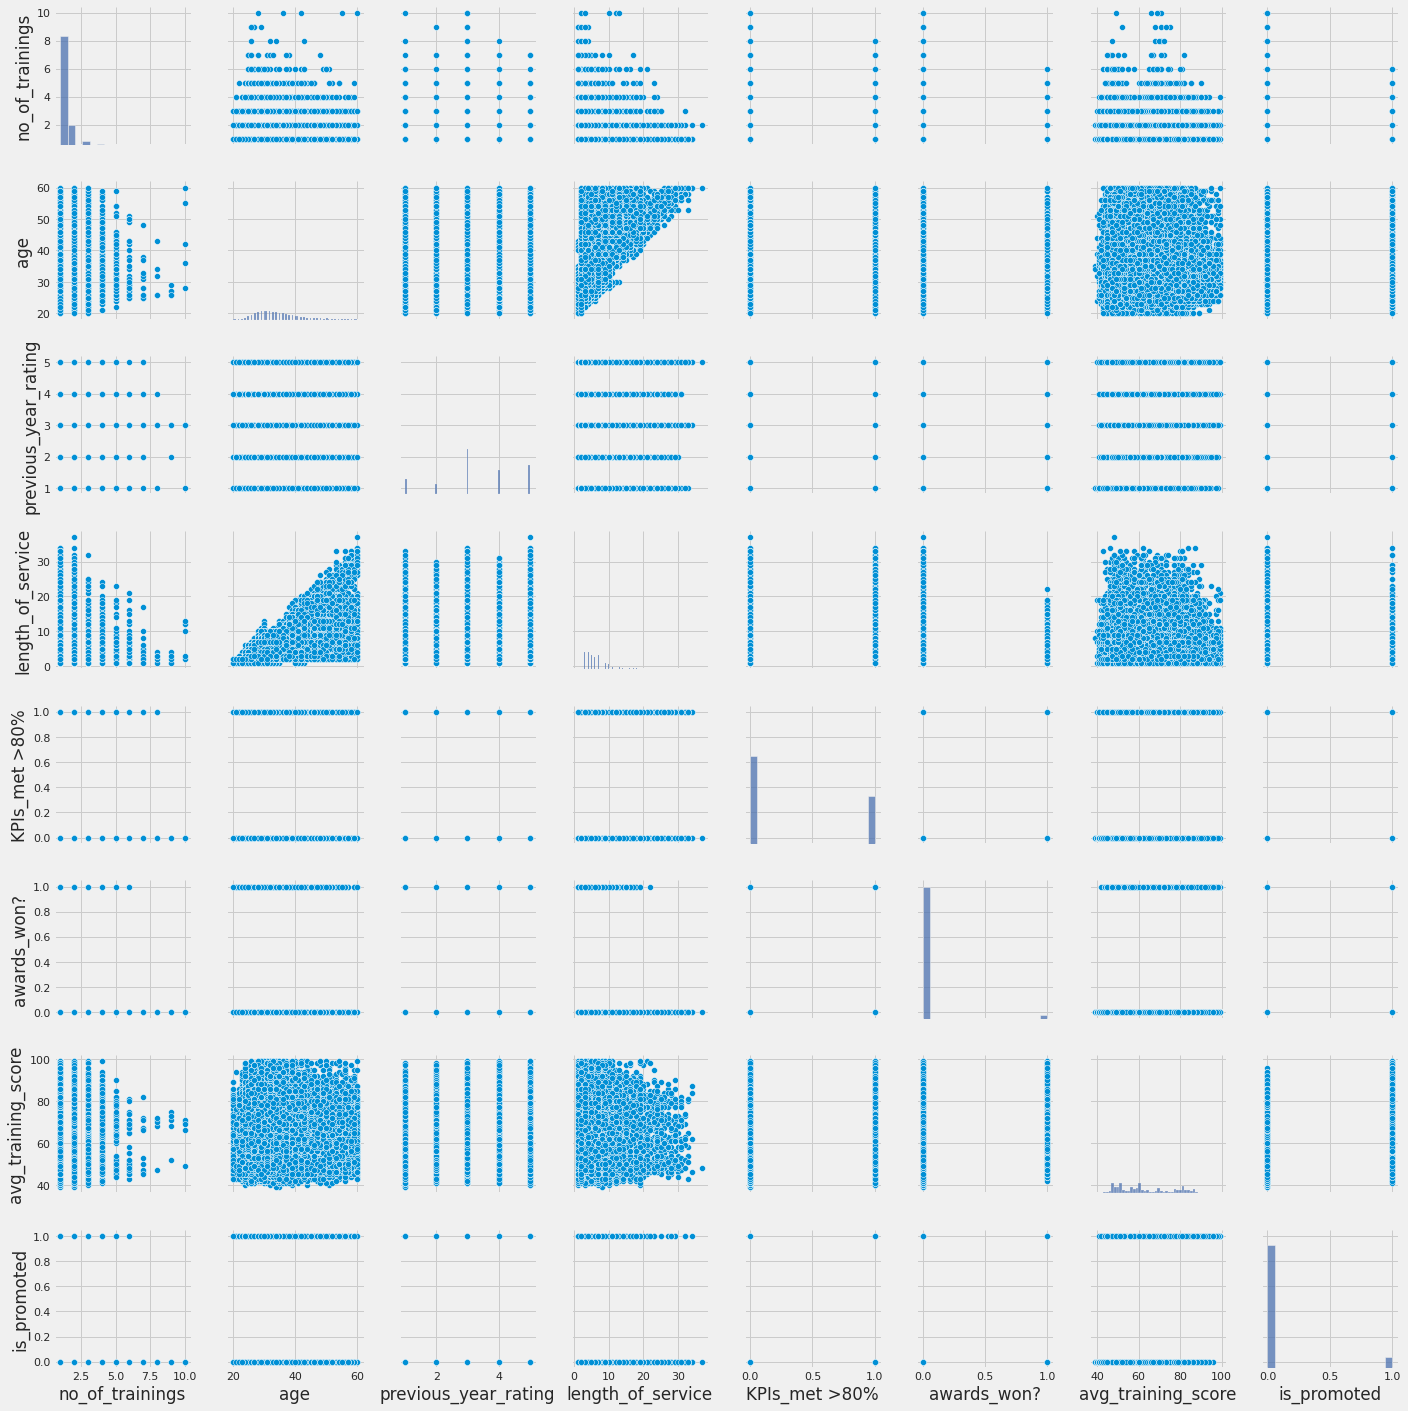

In [ ]:
sns.pairplot(data_train)
plt.show()



*   The Pairplot is showing the relationship of all with each other. In some comparisons, the features are distributed more and that is the case of continuous.


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


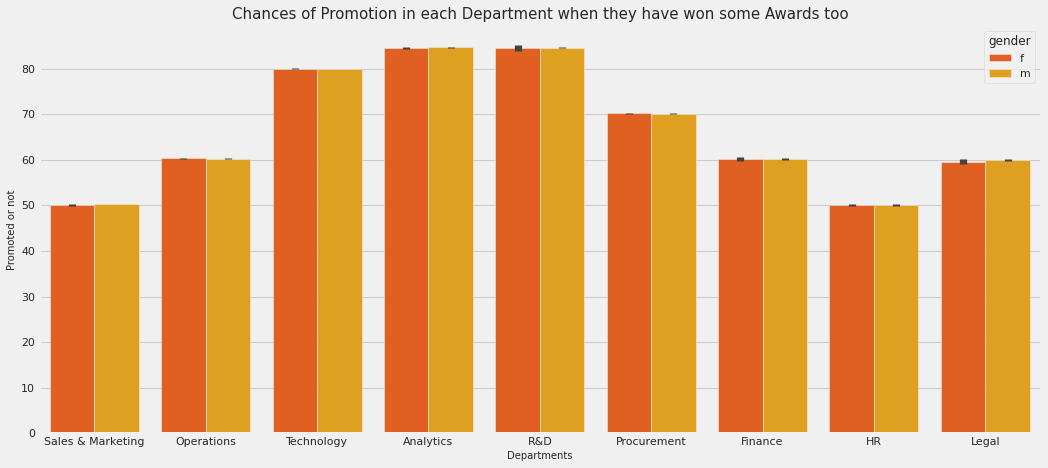

In [ ]:
# lets check the relation of Departments and Promotions when they won awards ?

plt.rcParams['figure.figsize'] = (16, 7)
sns.barplot(data_train['department'], data_train['avg_training_score'], hue = data_train['gender'], palette = 'autumn')
plt.title('Chances of Promotion in each Department when they have won some Awards too', fontsize = 15)
plt.ylabel('Promoted or not', fontsize = 10)
plt.xlabel('Departments', fontsize = 10)
plt.show()

# Previous Year Ratings of Educations

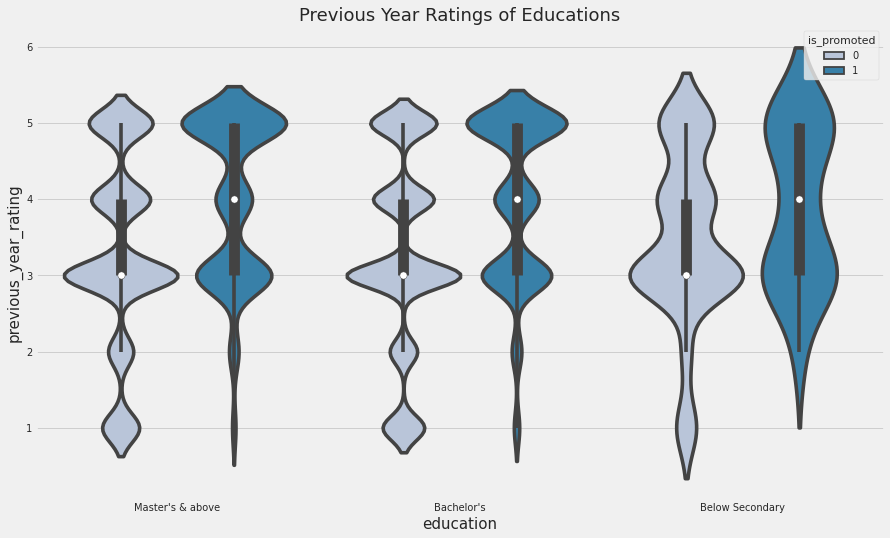

In [ ]:
plt.figure(figsize=(15,9),dpi=65)
sns.violinplot(data=data_train,x=data_train['education'],y='previous_year_rating',hue='is_promoted',palette='PuBu')
plt.title('Previous Year Ratings of Educations',size=20);

# Average Training Scores with Age

In [ ]:
import plotly.express as px
px.scatter(data_train, x="avg_training_score", y="age", color="is_promoted", marginal_y="violin",
           marginal_x="box", template="simple_white",height=750,title='Age and Average Training Score')

Text(0.5, 1.0, 'Age and Average Training Score')

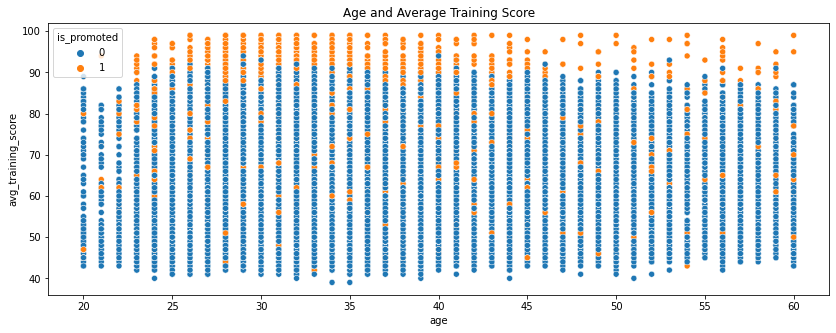

In [ ]:
plt.rcParams['figure.figsize'] = [14, 5]
sns.scatterplot(x='age',y='avg_training_score',hue='is_promoted',data=data_train)
plt.title('Age and Average Training Score')



*   This graph reinforces the fact the promotions are majorly dependent on the score and not on age



# Age with Department

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



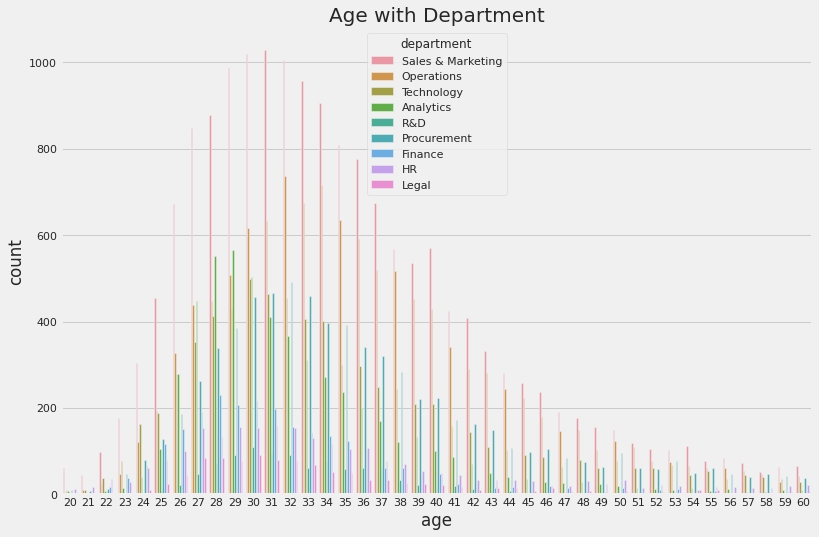

In [ ]:
plt.figure(figsize=(12,8))
sns.countplot(data_train['age'],hue=data_train['department'])
plt.title('Age with Department',size=20);
plt.show()

# Education with Department

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



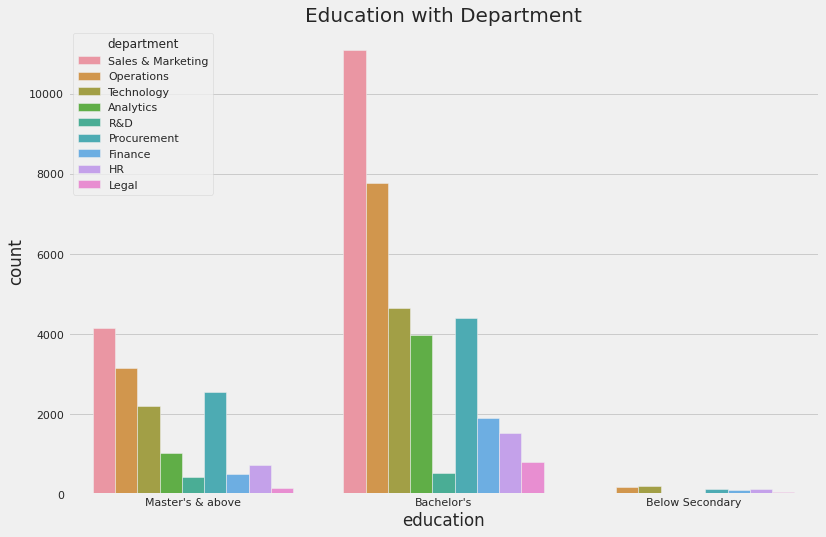

In [ ]:
plt.figure(figsize=(12,8))
sns.countplot(data_train['education'],hue=data_train['department'])
plt.title('Education with Department',size=20);
plt.show()



*   Most of the employees are from Batcholer degree holders

*   Suprisingly most of the employees in sales and markeeting department are Batcholer degree holders





# Recruitment_Channel with Department

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



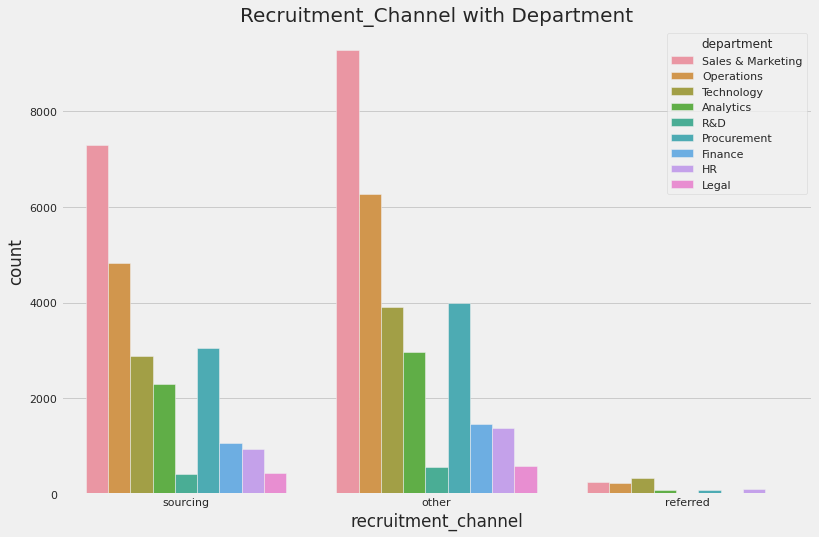

In [ ]:
plt.figure(figsize=(12,8))
sns.countplot(data_train['recruitment_channel'],hue=data_train['department'])
plt.title('Recruitment_Channel with Department',size=20);
plt.show()



*   Many employees are from other recruitment channels and some are from sourcing and referred employees are very less.



# Gender with Department and Promotion

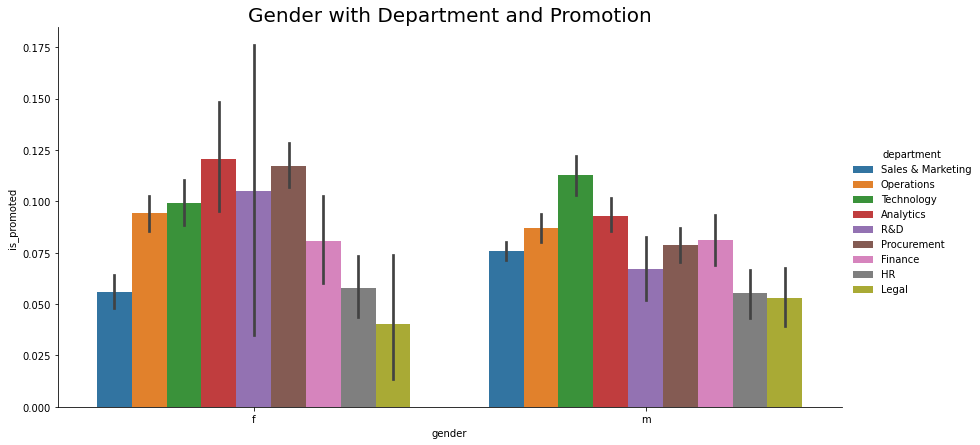

In [ ]:
sns.catplot(x="gender", y="is_promoted", hue="department", kind="bar", data=data_train, height=6, aspect=2)
plt.title('Gender with Department and Promotion',size=20);

# Gender with Recruitment_Channel and Promotion

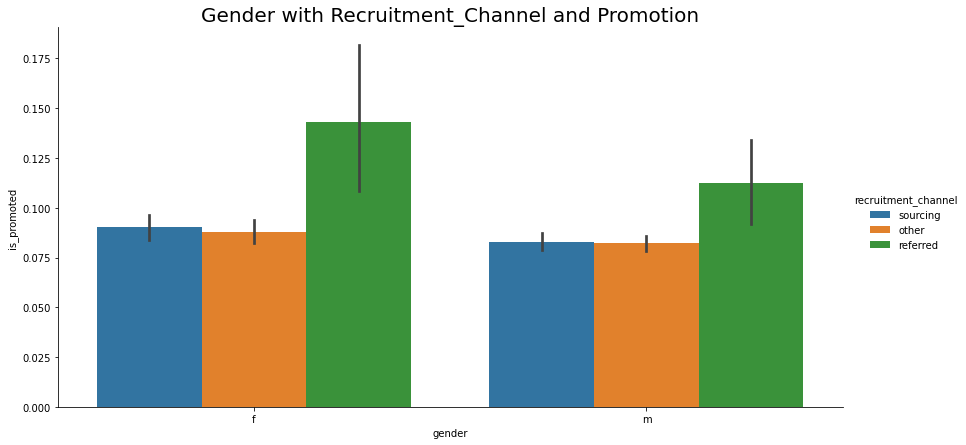

In [ ]:
sns.catplot(x="gender", y="is_promoted", hue="recruitment_channel", kind="bar", data=data_train, height=6, aspect=2)
plt.title('Gender with Recruitment_Channel and Promotion',size=20);

# Department with Recruitment_Channel and Promotion

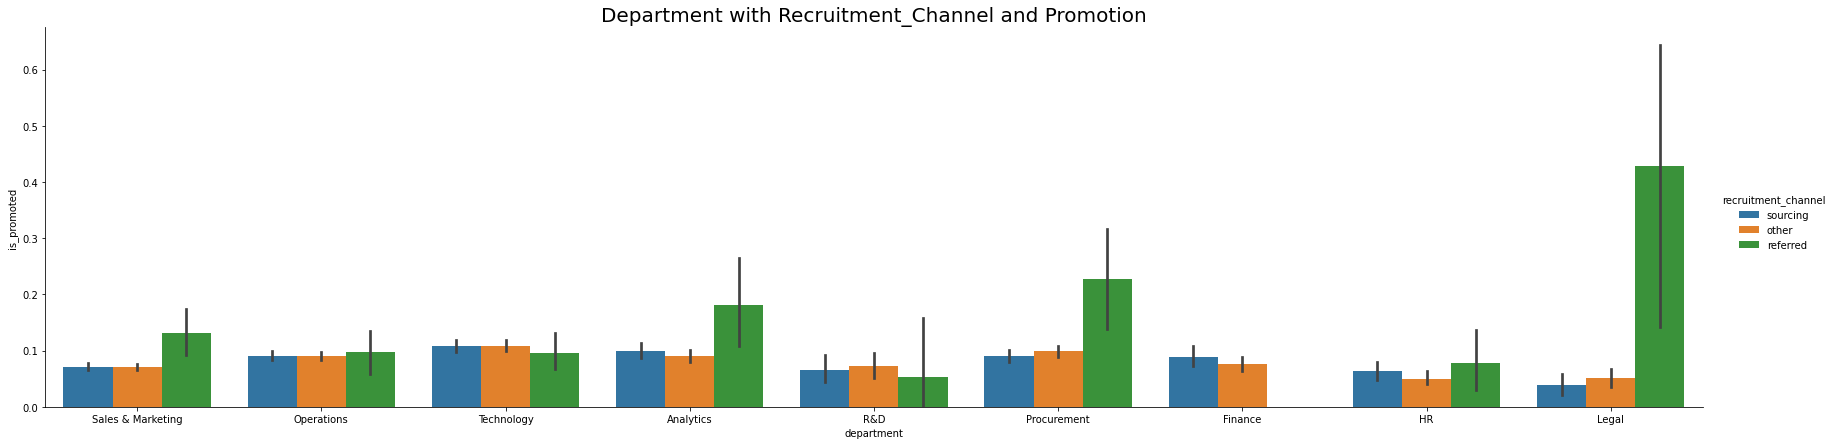

In [ ]:
sns.catplot(x="department", y="is_promoted", hue="recruitment_channel", kind="bar", data=data_train, height=6, aspect=4)
plt.title('Department with Recruitment_Channel and Promotion',size=20);

# **Outlier Detection**




*   The presence of outliers in a classification or regression dataset can result in a poor fit and lower predictive modeling performance. Instead, automatic outlier detection methods can be used in the modeling pipeline and compared, just like other data preparation transforms that may be applied to the dataset.



In [ ]:
# Lets first analyze the Numberical Columns
data_train.select_dtypes('number').head()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,1,35,5.0,8,1,0,49,0
1,65141,1,30,5.0,4,0,0,60,0
2,7513,1,34,3.0,7,0,0,50,0
3,2542,2,39,1.0,10,0,0,50,0
4,48945,1,45,3.0,2,0,0,73,0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

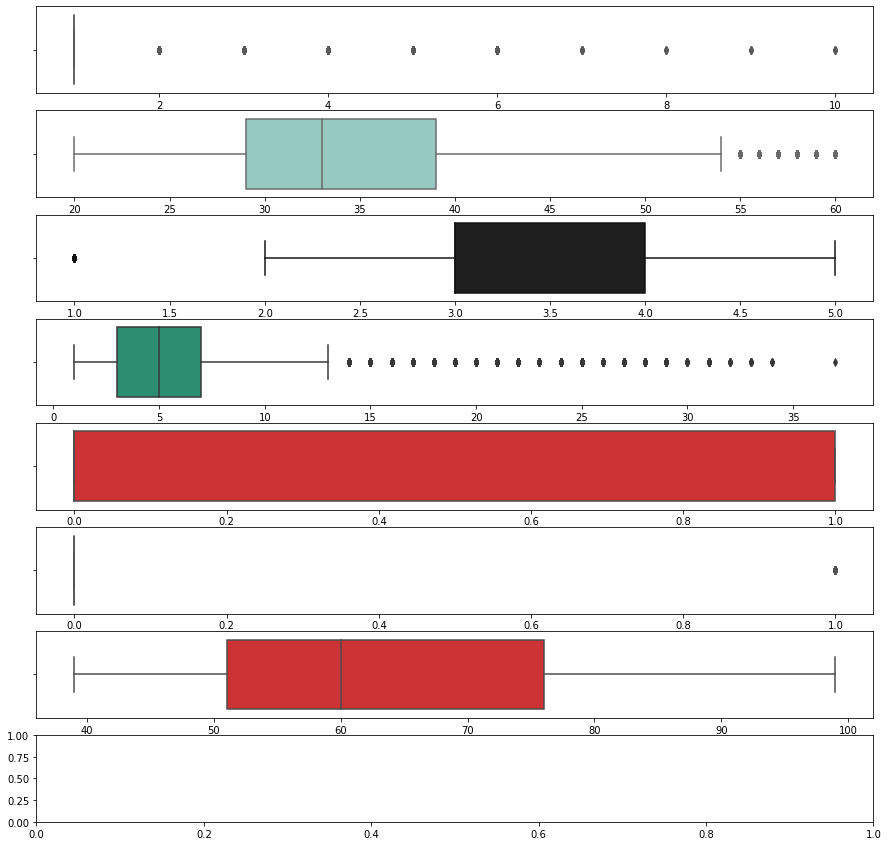

In [ ]:
fig, axarr = plt.subplots(8, 1, figsize=(15, 15))


sns.boxplot(data_train['no_of_trainings'],palette='Set2',ax=axarr[0])
sns.boxplot(data_train['age'],palette='Set3',ax=axarr[1])
sns.boxplot(data_train['previous_year_rating'],palette='icefire',ax=axarr[2])
sns.boxplot(data_train['length_of_service'],palette='Dark2',ax=axarr[3])
sns.boxplot(data_train['KPIs_met >80%'],palette='Set1',ax=axarr[4])
sns.boxplot(data_train['awards_won?'],palette='plasma',ax=axarr[5])
sns.boxplot(data_train['avg_training_score'],palette='Set1',ax=axarr[6])
plt.show()



*   The Age column is having some outliers but we can ignore them as they are the old aged people and they are also eligible for promotion

*   Rest all the features are not having any pothential outliers





/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


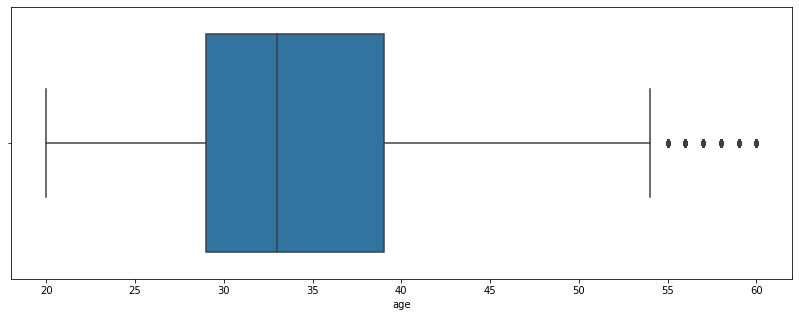

In [ ]:
sns.boxplot(data_train['age'])

There is a lot that we can learn from a box plot:

*   The middle line in the blue are is the 50% which is the median of the data
*   The Blue region is the 'Inter Quartile Range' whih is calculated by Q3-Q1 this represents the range where most of the data is distributed

*   The two horizontal lines at the ends are the boundries for outliers which are calculted by Q1-1.5IQR and Q3+1.5IQR
*   so anything beyond this boundary is considered as an outlier





/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


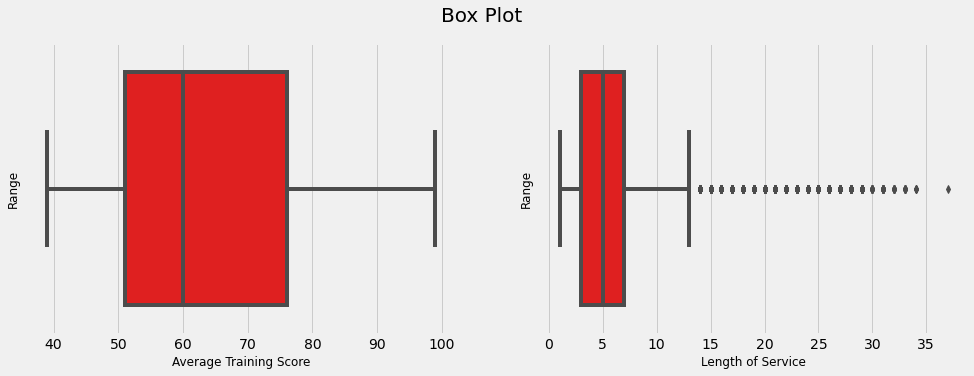

In [ ]:
# lets check the boxplots for the columns where we suspect for outliers
plt.rcParams['figure.figsize'] = (15, 5)
plt.style.use('fivethirtyeight')

# Box plot for average training score
plt.subplot(1, 2, 1)
sns.boxplot(data_train['avg_training_score'], color = 'red')
plt.xlabel('Average Training Score', fontsize = 12)
plt.ylabel('Range', fontsize = 12)

# Box plot for length of service
plt.subplot(1, 2, 2)
sns.boxplot(data_train['length_of_service'], color = 'red')
plt.xlabel('Length of Service', fontsize = 12)
plt.ylabel('Range', fontsize = 12)

plt.suptitle('Box Plot', fontsize = 20)
plt.show()



*   Here, the Box plot, helps us to analyze the middle 50 percentile of the data, and we can clearly check the minimum, maximum, median, and outlier values. In the Length of service attribute, we can see some points after the Max Value, which can be termed to be as Outliers. We do not need to remove these values, as the values are not very far and Huge.



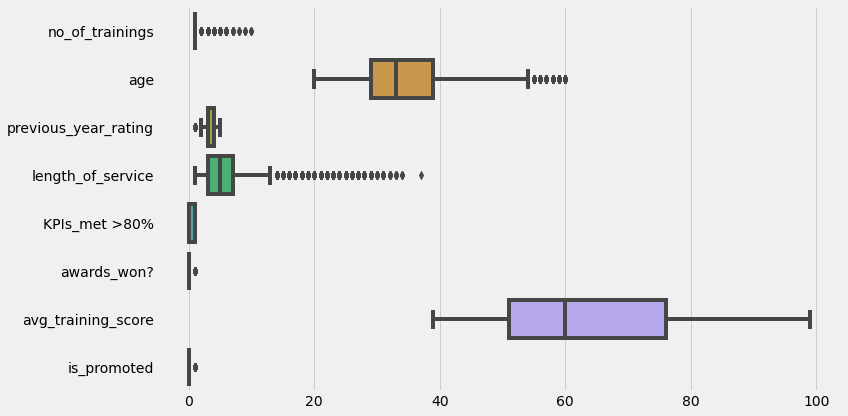

In [ ]:
sns.catplot(data=data_train, orient="h", kind="box", height=6, aspect=2)